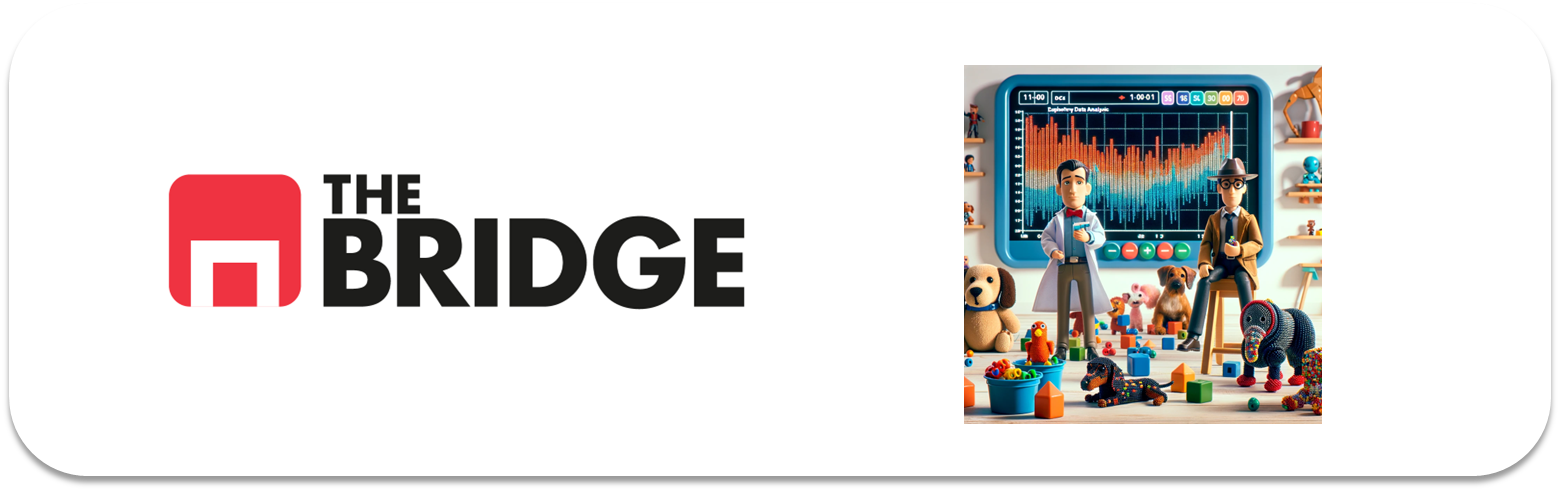

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
 pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, grafico_dispersion_con_correlacion, bubble_plot

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [4]:
df=pd.read_csv("./data/titanic.csv")

In [5]:
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [9]:
df.drop("deck",axis=1,inplace=True)
df.drop("survived",axis=1,inplace=True)
df.drop("pclass",axis=1,inplace=True)
df.drop("embarked",axis=1,inplace=True)
df

sex   age  sibsp  parch     fare   class    who  adult_male  \
0      male  22.0      1      0   7.2500   Third    man        True   
1    female  38.0      1      0  71.2833   First  woman       False   
2    female  26.0      0      0   7.9250   Third  woman       False   
3    female  35.0      1      0  53.1000   First  woman       False   
4      male  35.0      0      0   8.0500   Third    man        True   
..      ...   ...    ...    ...      ...     ...    ...         ...   
886    male  27.0      0      0  13.0000  Second    man        True   
887  female  19.0      0      0  30.0000   First  woman       False   
888  female   NaN      1      2  23.4500   Third  woman       False   
889    male  26.0      0      0  30.0000   First    man        True   
890    male  32.0      0      0   7.7500   Third    man        True   

     embark_town alive  alone  
0    Southampton    no  False  
1      Cherbourg   yes  False  
2    Southampton   yes   True  
3    Southampton   yes  False  
4    Southampton    no   True  
..           ...   ...    ...  
886  Southampton    no   True  
887  Southampton   yes   True  
888  Southampton    no  False  
889    Cherbourg   yes   True  
890   Queenstown    no   True  

[891 rows x 11 columns]

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [11]:
df["family_members"]=df["parch"]+df["sibsp"]
df

sex   age  sibsp  parch     fare   class    who  adult_male  \
0      male  22.0      1      0   7.2500   Third    man        True   
1    female  38.0      1      0  71.2833   First  woman       False   
2    female  26.0      0      0   7.9250   Third  woman       False   
3    female  35.0      1      0  53.1000   First  woman       False   
4      male  35.0      0      0   8.0500   Third    man        True   
..      ...   ...    ...    ...      ...     ...    ...         ...   
886    male  27.0      0      0  13.0000  Second    man        True   
887  female  19.0      0      0  30.0000   First  woman       False   
888  female   NaN      1      2  23.4500   Third  woman       False   
889    male  26.0      0      0  30.0000   First    man        True   
890    male  32.0      0      0   7.7500   Third    man        True   

     embark_town alive  alone  family_members  
0    Southampton    no  False               1  
1      Cherbourg   yes  False               1  
2    Southampton   yes   True               0  
3    Southampton   yes  False               1  
4    Southampton    no   True               0  
..           ...   ...    ...             ...  
886  Southampton    no   True               0  
887  Southampton   yes   True               0  
888  Southampton    no  False               3  
889    Cherbourg   yes   True               0  
890   Queenstown    no   True               0  

[891 rows x 12 columns]

In [15]:
df.drop("parch",axis=1,inplace=True)
df.drop("sibsp",axis=1,inplace=True)
df

sex   age     fare   class    who  adult_male  embark_town alive  \
0      male  22.0   7.2500   Third    man        True  Southampton    no   
1    female  38.0  71.2833   First  woman       False    Cherbourg   yes   
2    female  26.0   7.9250   Third  woman       False  Southampton   yes   
3    female  35.0  53.1000   First  woman       False  Southampton   yes   
4      male  35.0   8.0500   Third    man        True  Southampton    no   
..      ...   ...      ...     ...    ...         ...          ...   ...   
886    male  27.0  13.0000  Second    man        True  Southampton    no   
887  female  19.0  30.0000   First  woman       False  Southampton   yes   
888  female   NaN  23.4500   Third  woman       False  Southampton    no   
889    male  26.0  30.0000   First    man        True    Cherbourg   yes   
890    male  32.0   7.7500   Third    man        True   Queenstown    no   

     alone  family_members  
0    False               1  
1    False               1  
2     True               0  
3    False               1  
4     True               0  
..     ...             ...  
886   True               0  
887   True               0  
888  False               3  
889   True               0  
890   True               0  

[891 rows x 10 columns]

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [20]:
df.loc[df["embark_town"].isna(),"embark_town"]=df["embark_town"].mode()
df

sex   age     fare   class    who  adult_male  embark_town alive  \
0      male  22.0   7.2500   Third    man        True  Southampton    no   
1    female  38.0  71.2833   First  woman       False    Cherbourg   yes   
2    female  26.0   7.9250   Third  woman       False  Southampton   yes   
3    female  35.0  53.1000   First  woman       False  Southampton   yes   
4      male  35.0   8.0500   Third    man        True  Southampton    no   
..      ...   ...      ...     ...    ...         ...          ...   ...   
886    male  27.0  13.0000  Second    man        True  Southampton    no   
887  female  19.0  30.0000   First  woman       False  Southampton   yes   
888  female   NaN  23.4500   Third  woman       False  Southampton    no   
889    male  26.0  30.0000   First    man        True    Cherbourg   yes   
890    male  32.0   7.7500   Third    man        True   Queenstown    no   

     alone  family_members  
0    False               1  
1    False               1  
2     True               0  
3    False               1  
4     True               0  
..     ...             ...  
886   True               0  
887   True               0  
888  False               3  
889   True               0  
890   True               0  

[891 rows x 10 columns]

In [21]:
df.loc[df["embark_town"].isna()]

sex   age  fare  class    who  adult_male embark_town alive  alone  \
61   female  38.0  80.0  First  woman       False         NaN   yes   True   
829  female  62.0  80.0  First  woman       False         NaN   yes   True   

     family_members  
61                0  
829               0

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [23]:
df.loc[df["age"].isna()]

sex  age     fare   class    who  adult_male  embark_town alive  \
5      male  NaN   8.4583   Third    man        True   Queenstown    no   
17     male  NaN  13.0000  Second    man        True  Southampton   yes   
19   female  NaN   7.2250   Third  woman       False    Cherbourg   yes   
26     male  NaN   7.2250   Third    man        True    Cherbourg    no   
28   female  NaN   7.8792   Third  woman       False   Queenstown   yes   
..      ...  ...      ...     ...    ...         ...          ...   ...   
859    male  NaN   7.2292   Third    man        True    Cherbourg    no   
863  female  NaN  69.5500   Third  woman       False  Southampton    no   
868    male  NaN   9.5000   Third    man        True  Southampton    no   
878    male  NaN   7.8958   Third    man        True  Southampton    no   
888  female  NaN  23.4500   Third  woman       False  Southampton    no   

     alone  family_members  
5     True               0  
17    True               0  
19    True               0  
26    True               0  
28    True               0  
..     ...             ...  
859   True               0  
863  False              10  
868   True               0  
878   True               0  
888  False               3  

[177 rows x 10 columns]

In [25]:
for who in df["who"].unique():
    df.loc[(df["who"]==who)&(df["age"].isna()),"age"]=df[df["who"]==who]["age"].mode()[0]

In [28]:
df.iloc[863]

sex                    female
age                      24.0
fare                    69.55
class                   Third
who                     woman
adult_male              False
embark_town       Southampton
alive                      no
alone                   False
family_members             10
Name: 863, dtype: object

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

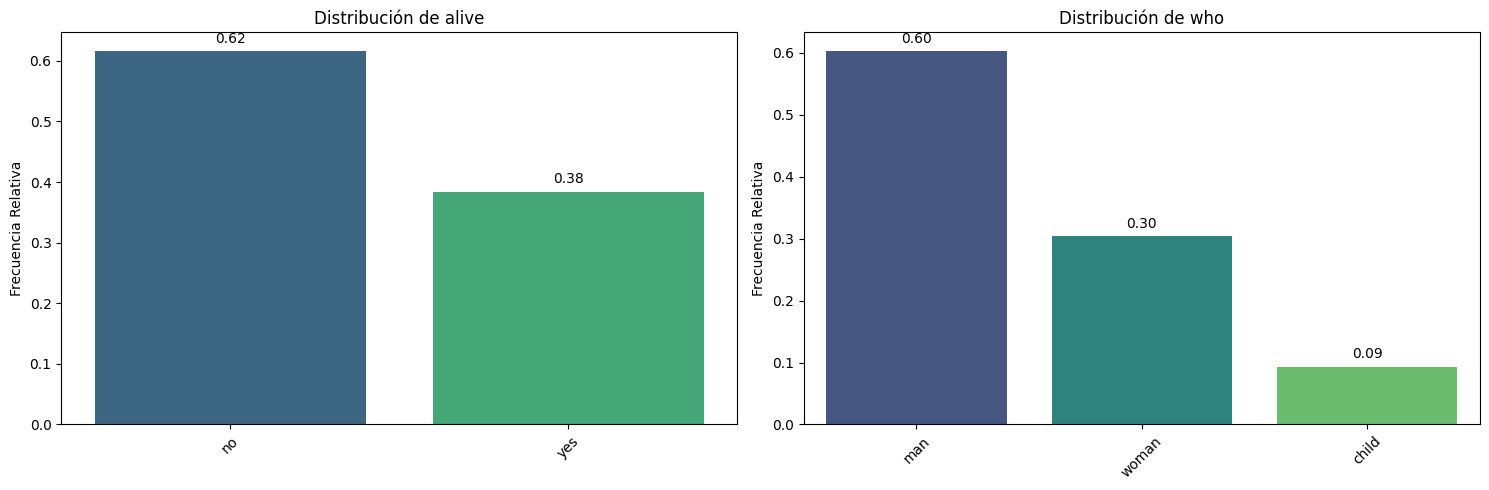

In [40]:
#1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic? ¿Y entre ser adulto o ser niño?
pinta_distribucion_categoricas(df,["alive","who"], relativa= True, mostrar_valores=True)

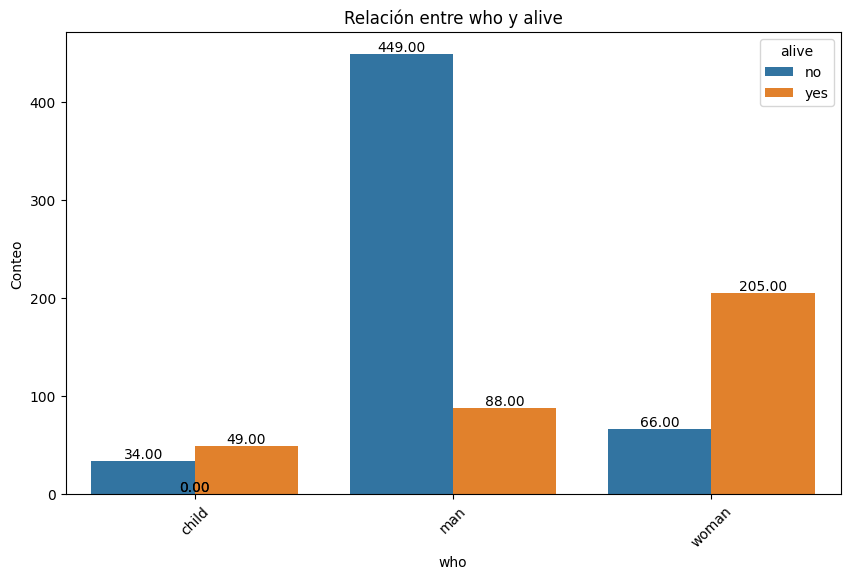

In [41]:
plot_categorical_relationship_fin(df,"who","alive", show_values= True)

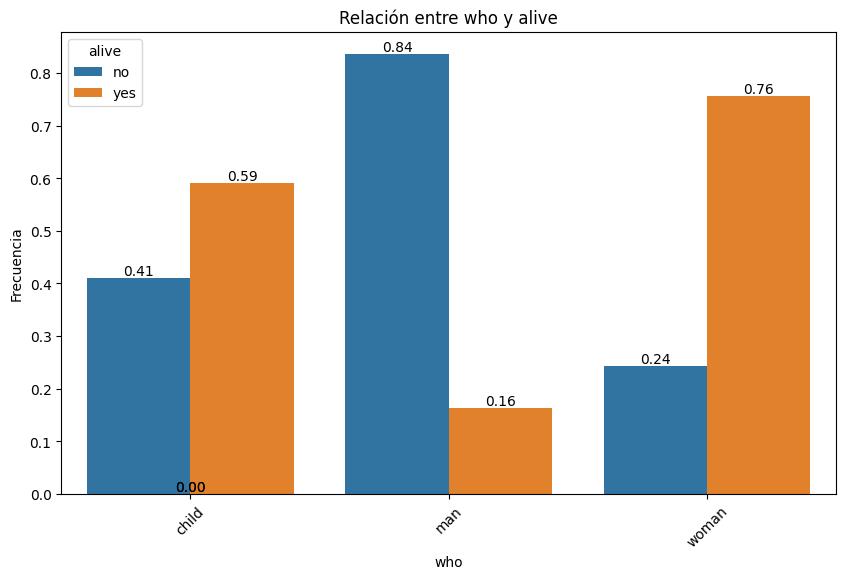

In [42]:
plot_categorical_relationship_fin(df,"who","alive", show_values= True,relative_freq=True)

In [ ]:
# Existen diferencias significativas. Las mujeres son las que presentan una mejor tasa de supervivencia seguida de los niños. Ambas tasas se sitúan
# por debajo de la media global (24% y 41% respecitavemente vs.62%). ¿Puede ser que esto tenga que ver con la clase?

In [106]:
# Para dar cridibilidad a mi hipotesis: test chi2
tabla_contingencia = pd.crosstab(df["alive"], df["who"])
tabla_contingencia
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)
#no sé porqué me da error

KeyError: 'alive'

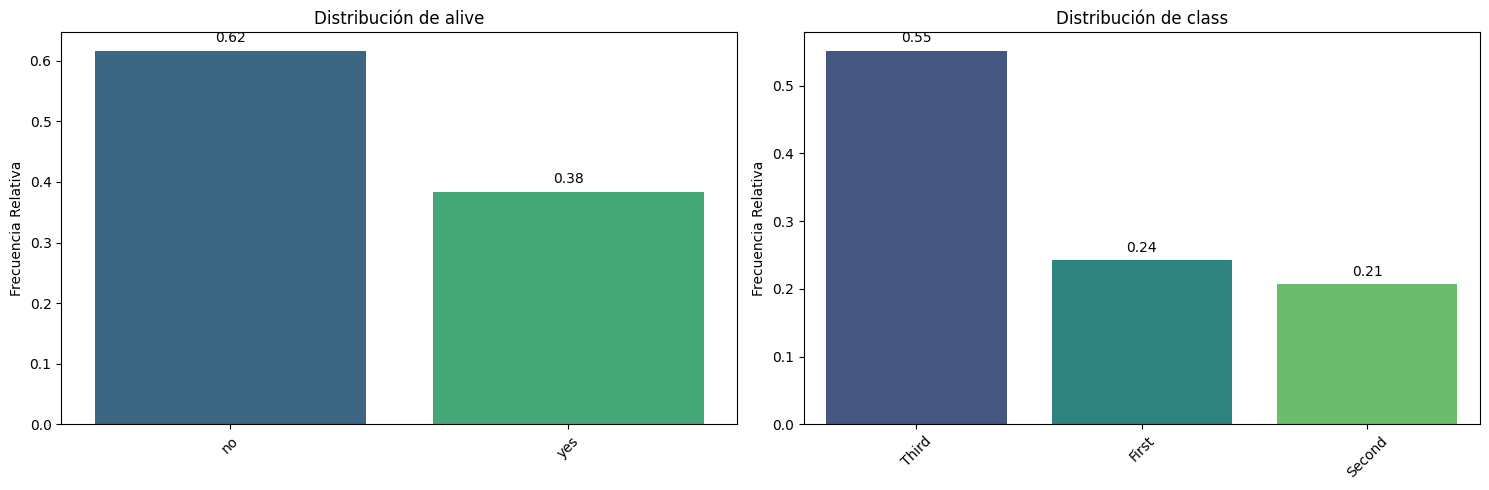

In [63]:
#2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?
pinta_distribucion_categoricas(df,["alive","class"], relativa= True, mostrar_valores=True)

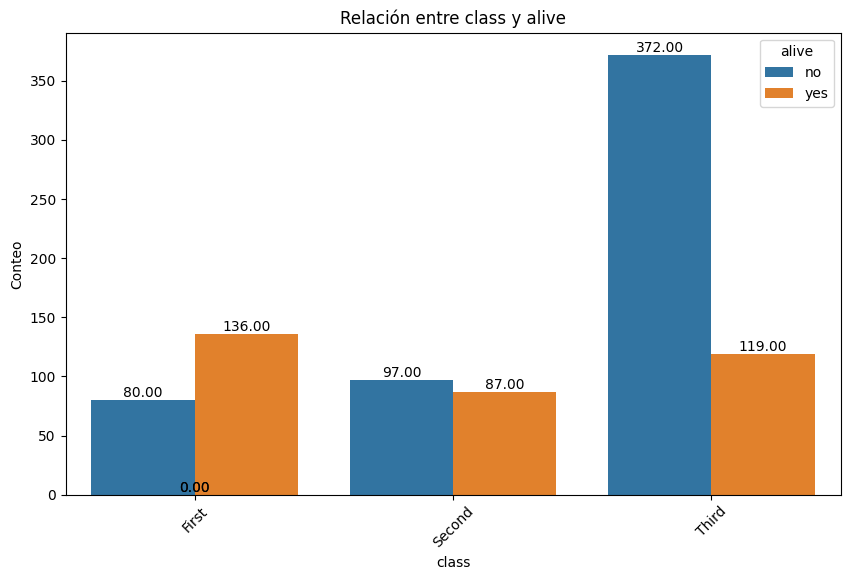

In [64]:
plot_categorical_relationship_fin(df,"class","alive", show_values= True)

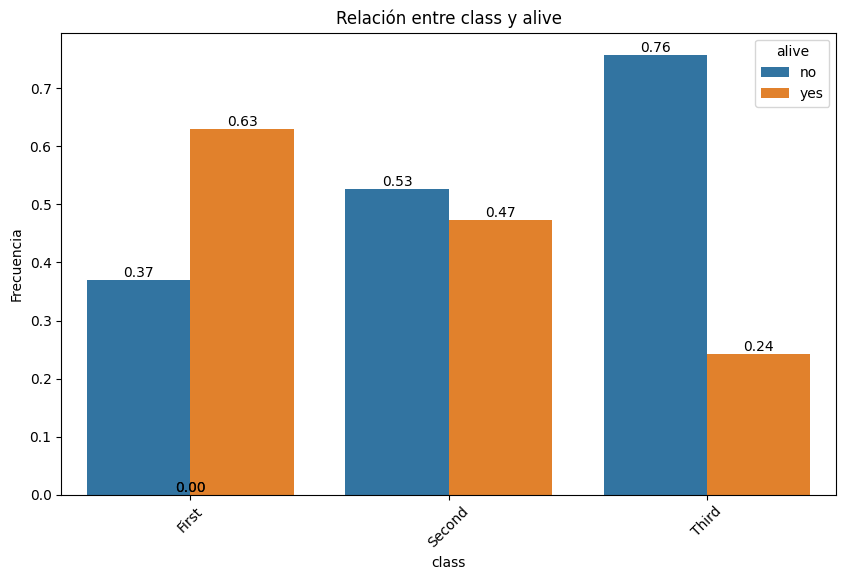

In [65]:
plot_categorical_relationship_fin(df,"class","alive", show_values= True,relative_freq=True)

In [ ]:
# En términos absolutos sobrevivieron más pasajeros de First class aun representando sólo el 24% de pasajeros totales. Por ende, su frecuencia relativa también es la superior.
# Existen diferencias significativas en cuanto a la superviviencia según la clase en la que se viajaba. Primera clase tiene una tasa de supervivencia de63%, segunda del 47% y en tercera decrece hasta el 24%.

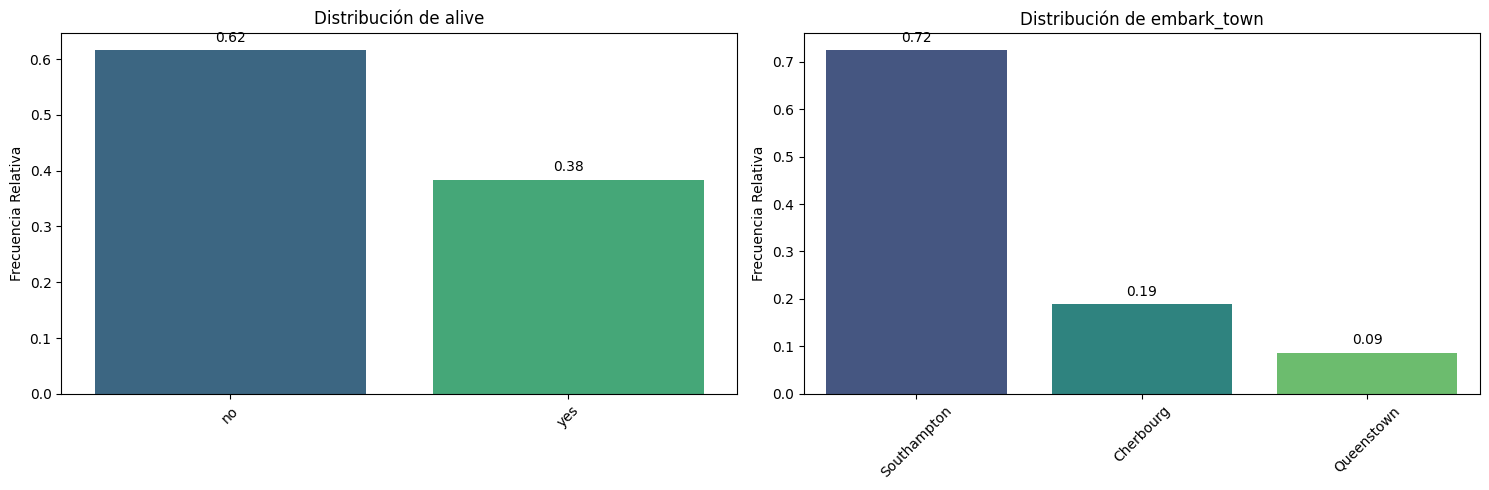

In [66]:
#3.¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?
pinta_distribucion_categoricas(df,["alive","embark_town"], relativa= True, mostrar_valores=True)

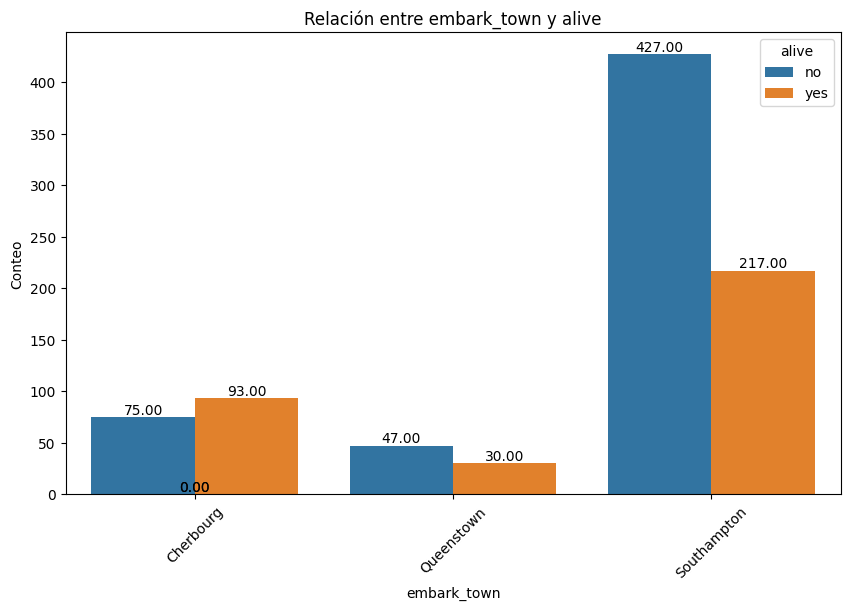

In [67]:
plot_categorical_relationship_fin(df,"embark_town","alive", show_values= True)

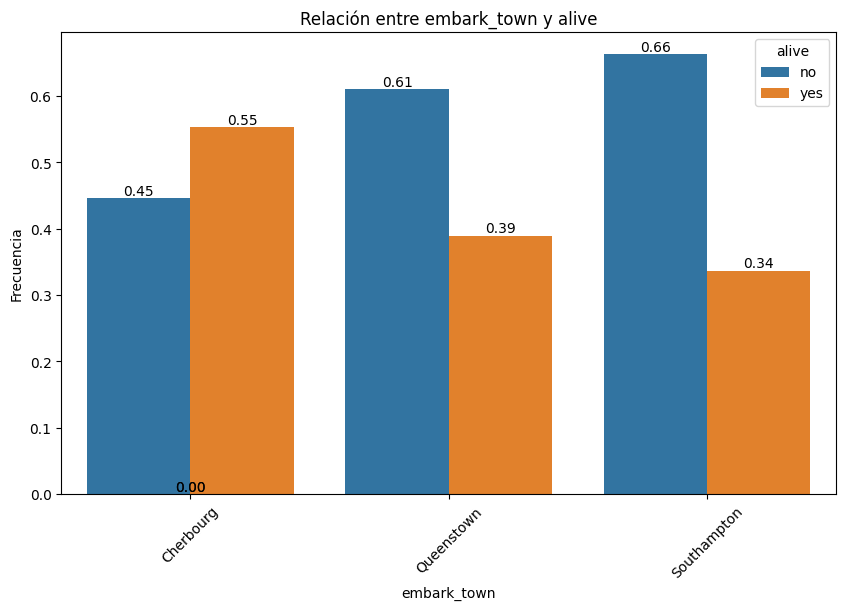

In [68]:
plot_categorical_relationship_fin(df,"embark_town","alive", show_values= True,relative_freq=True)

(2,)


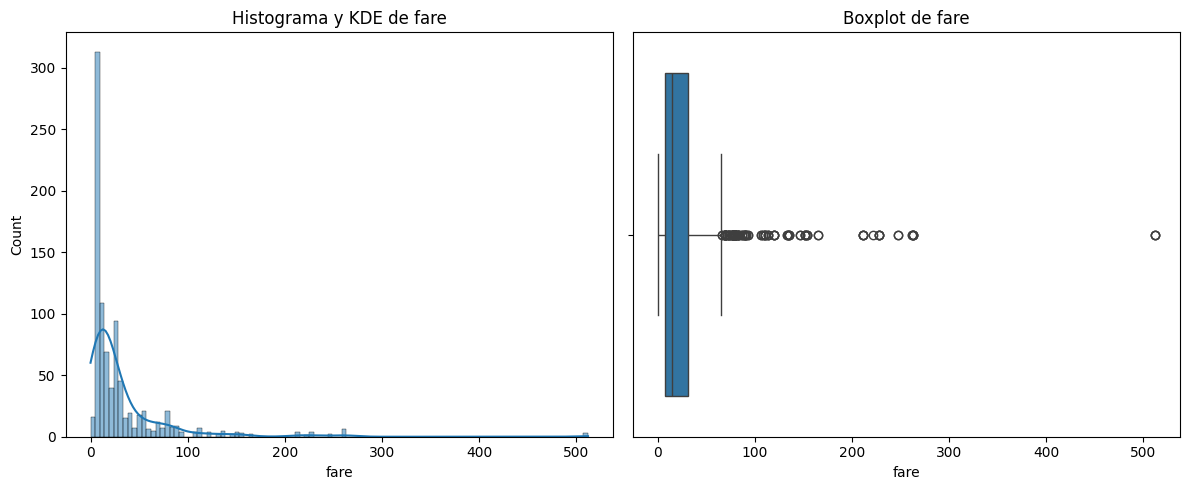

In [69]:
#4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?
plot_combined_graphs(df,["fare"])

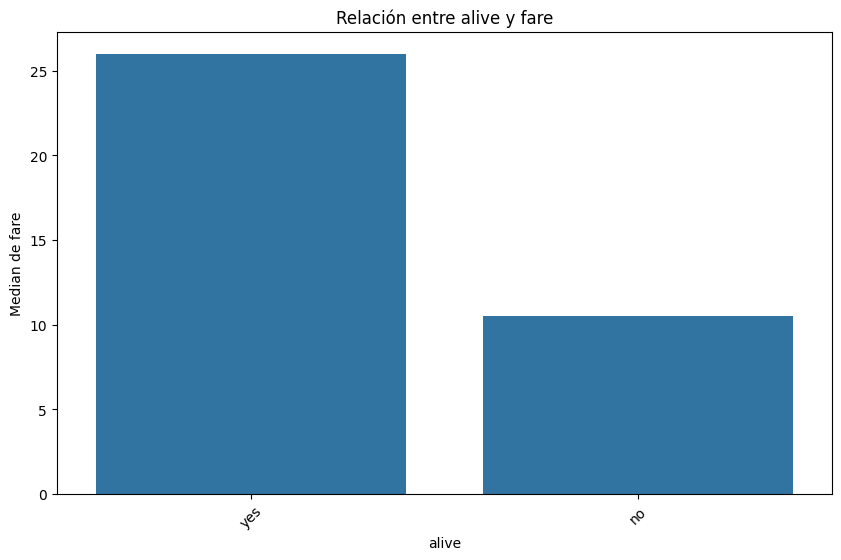

In [73]:
plot_categorical_numerical_relationship(df, "alive","fare",measure="median")

In [72]:
df.groupby("alive")["fare"].describe()

count       mean        std  min      25%   50%   75%       max
alive                                                                 
no     549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
yes    342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292

In [74]:
#5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?
df.loc[df["fare"]==0]

sex   age  fare   class  who  adult_male  embark_town alive  alone  \
179  male  36.0   0.0   Third  man        True  Southampton    no   True   
263  male  40.0   0.0   First  man        True  Southampton    no   True   
271  male  25.0   0.0   Third  man        True  Southampton   yes   True   
277  male  19.0   0.0  Second  man        True  Southampton    no   True   
302  male  19.0   0.0   Third  man        True  Southampton    no   True   
413  male  19.0   0.0  Second  man        True  Southampton    no   True   
466  male  19.0   0.0  Second  man        True  Southampton    no   True   
481  male  19.0   0.0  Second  man        True  Southampton    no   True   
597  male  49.0   0.0   Third  man        True  Southampton    no   True   
633  male  19.0   0.0   First  man        True  Southampton    no   True   
674  male  19.0   0.0  Second  man        True  Southampton    no   True   
732  male  19.0   0.0  Second  man        True  Southampton    no   True   
806  male  39.0   0.0   First  man        True  Southampton    no   True   
815  male  19.0   0.0   First  man        True  Southampton    no   True   
822  male  38.0   0.0   First  man        True  Southampton    no   True   

     family_members  
179               0  
263               0  
271               0  
277               0  
302               0  
413               0  
466               0  
481               0  
597               0  
633               0  
674               0  
732               0  
806               0  
815               0  
822               0

In [ ]:
# Pueden representar la tripulación ya que todos embarcaron en el primer puerto, sob hombres y su edad corresponde con la laboral. Además viajan todos solos y se distribuyen en las distintas clases.

In [79]:
df.loc[df["fare"]>512]

sex   age      fare  class    who  adult_male embark_town alive  \
258  female  35.0  512.3292  First  woman       False   Cherbourg   yes   
679    male  36.0  512.3292  First    man        True   Cherbourg   yes   
737    male  35.0  512.3292  First    man        True   Cherbourg   yes   

     alone  family_members  
258   True               0  
679  False               1  
737   True               0

In [ ]:
# 3 son las personas que pagaron la tarifa más alta por el viajes. 1 mujer y dos hombres, todos ellos embarcados en CHerbourg y con edades muy cercanas. Curiosamente 2 de ellos viajan solos pero uno de los hombres viaja con otra persona que debió pagar menos por el trayecto.

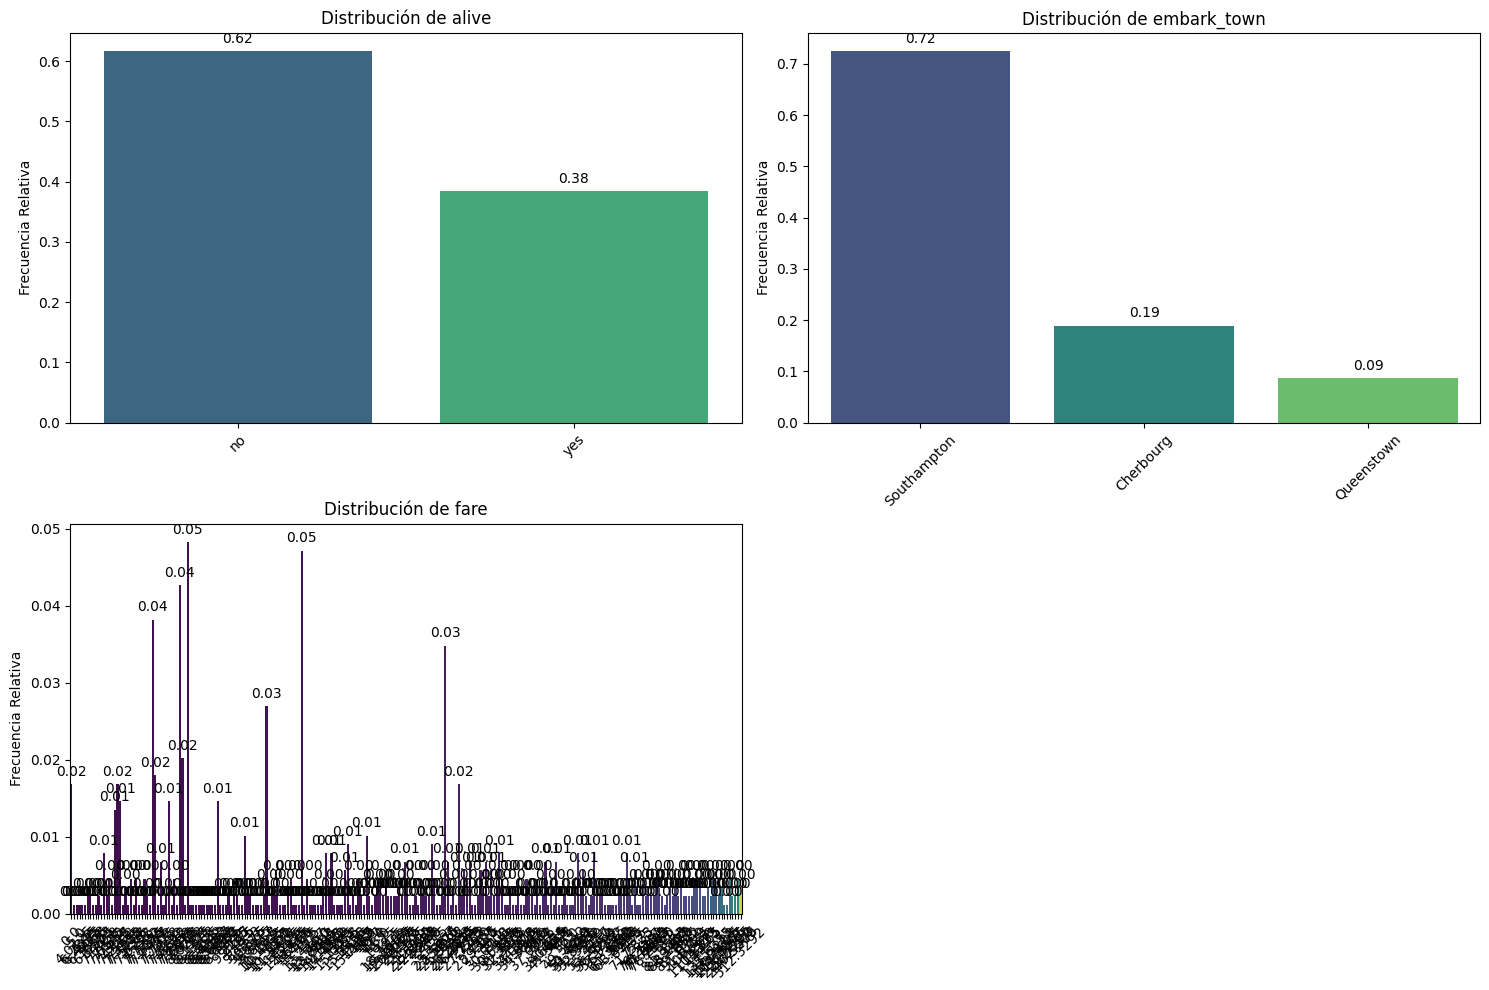

In [80]:
#6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.
pinta_distribucion_categoricas(df,["alive","embark_town","fare"], relativa=True, mostrar_valores= True)

In [81]:
columnas = ["alive","embark_town","fare"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df[col_directora].unique():
 diccionario_multivariante[valor] = df.loc[df[col_directora] ==valor,[col_2,col_1]]

Respuesta no:


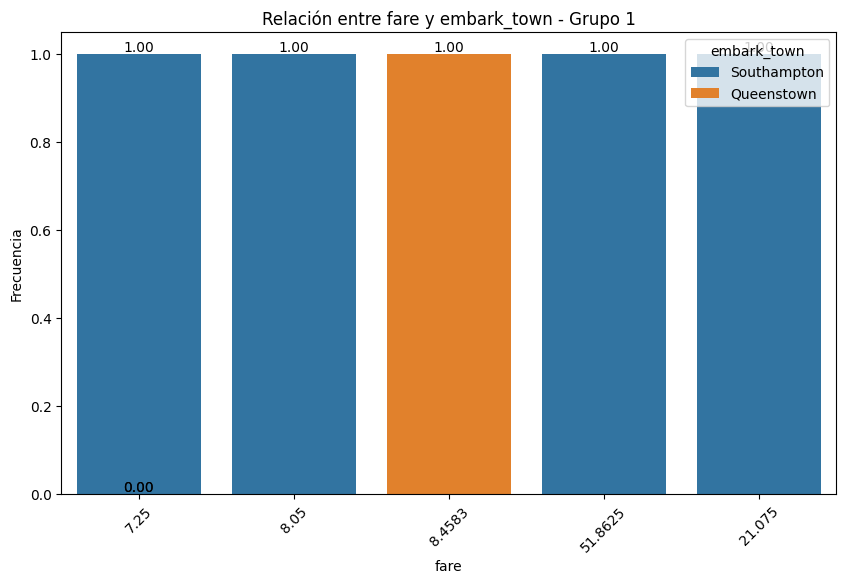

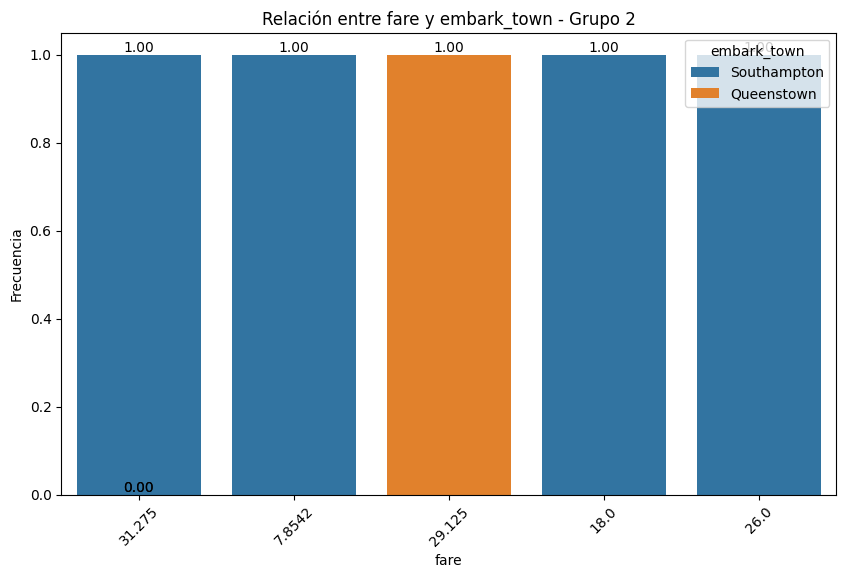

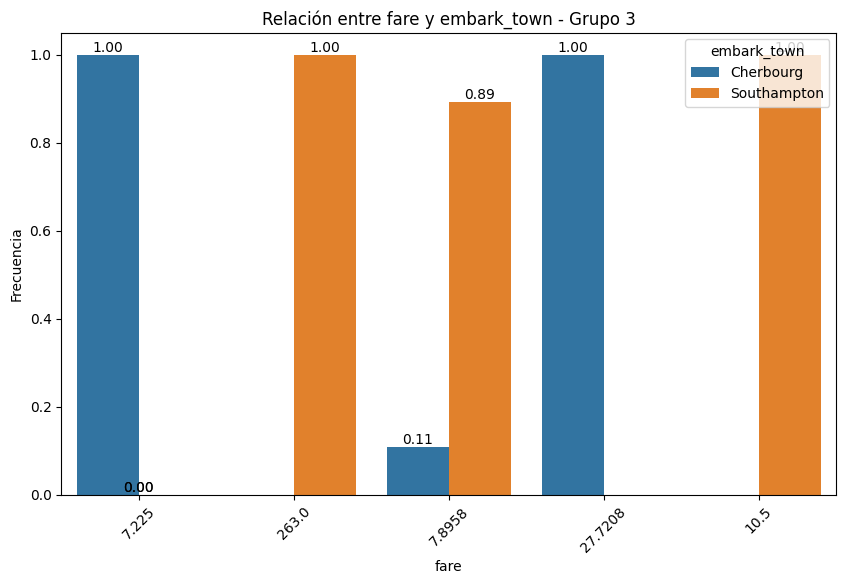

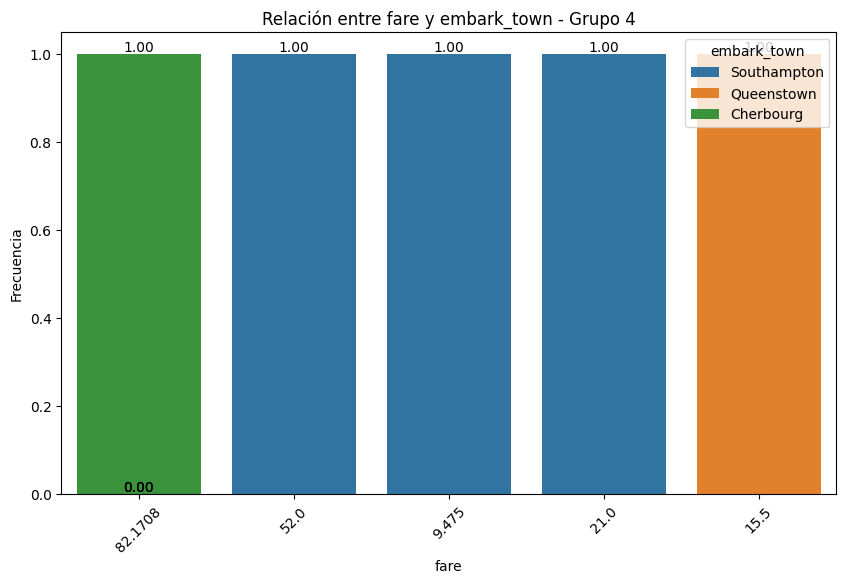

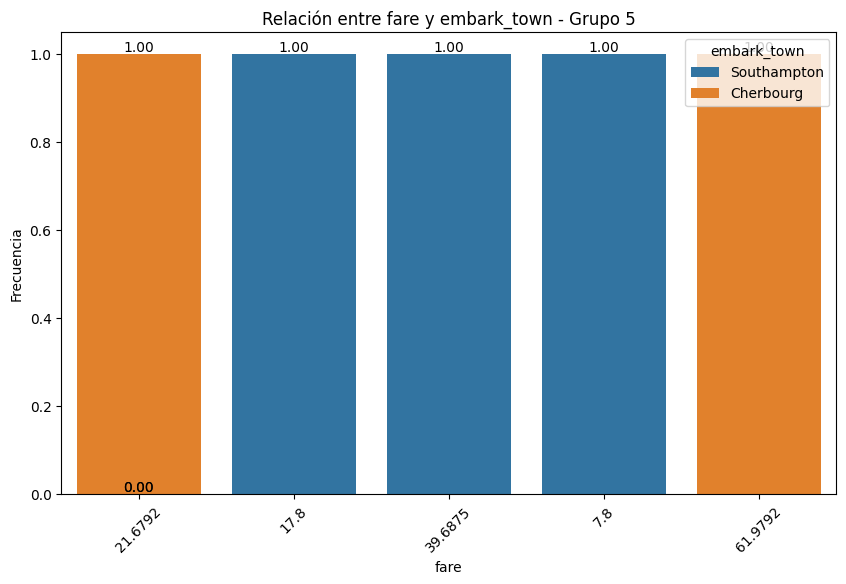

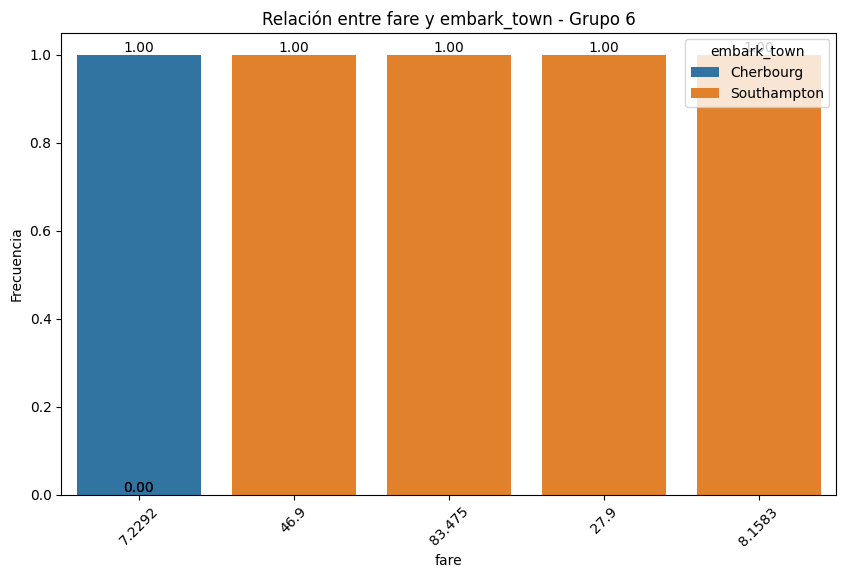

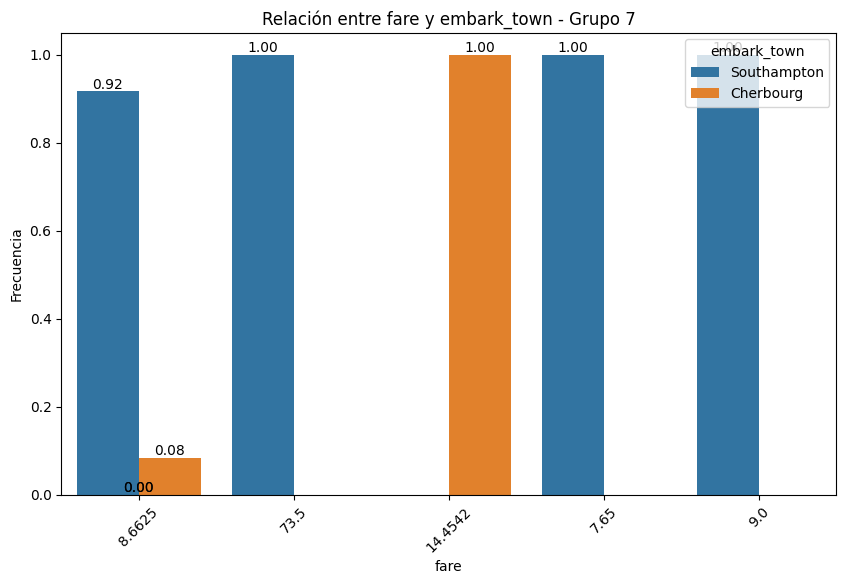

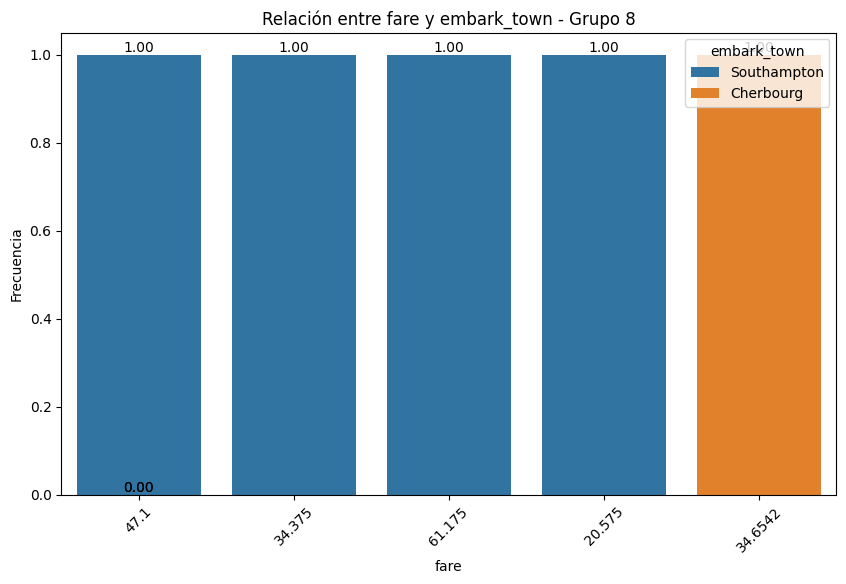

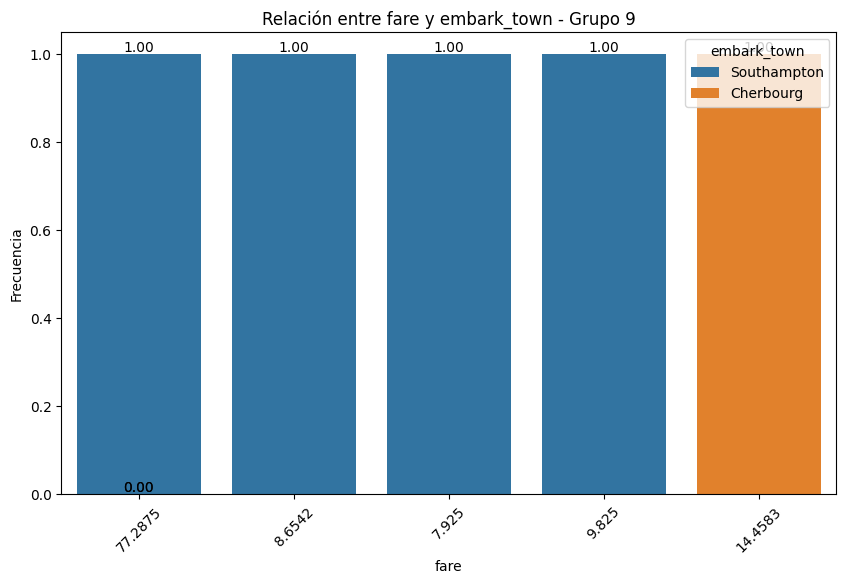

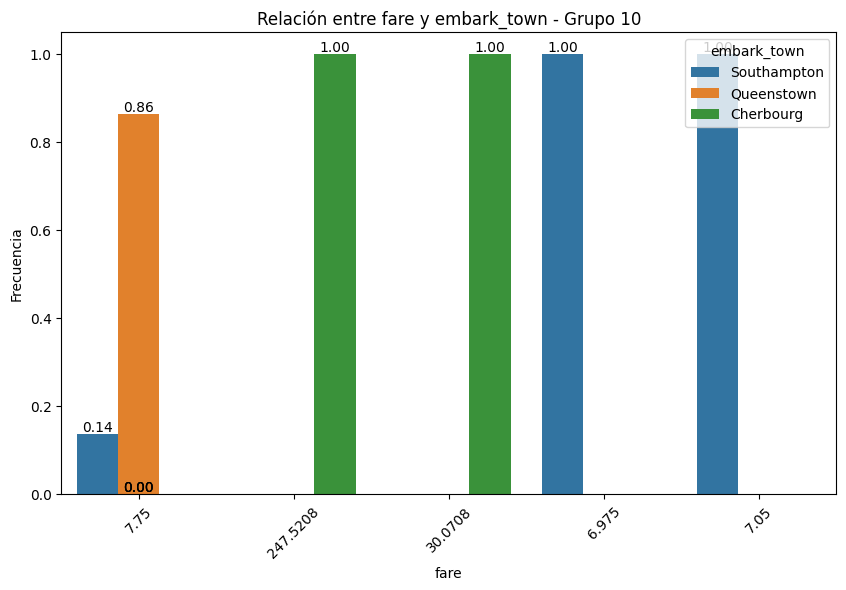

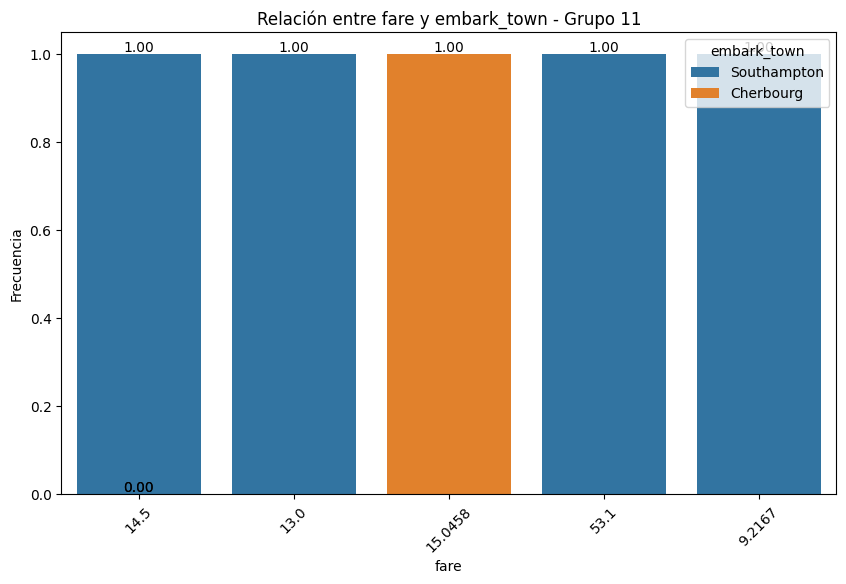

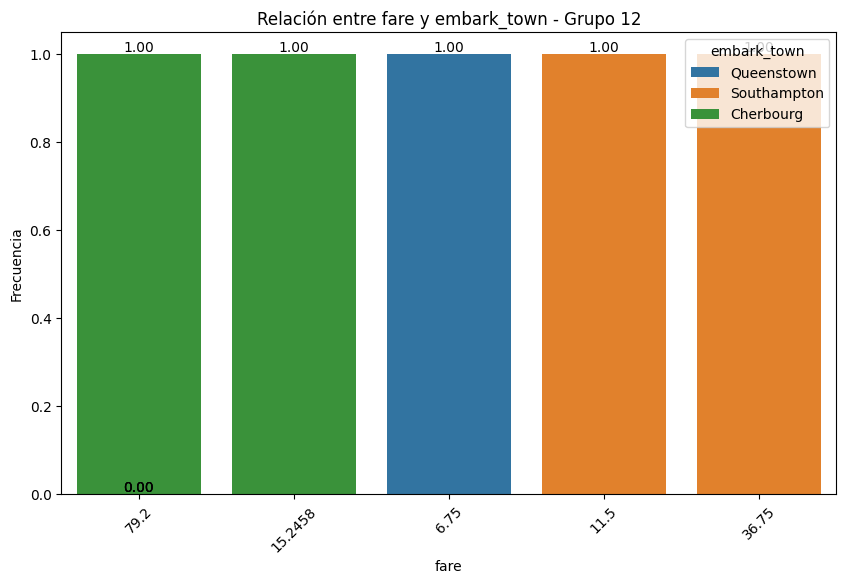

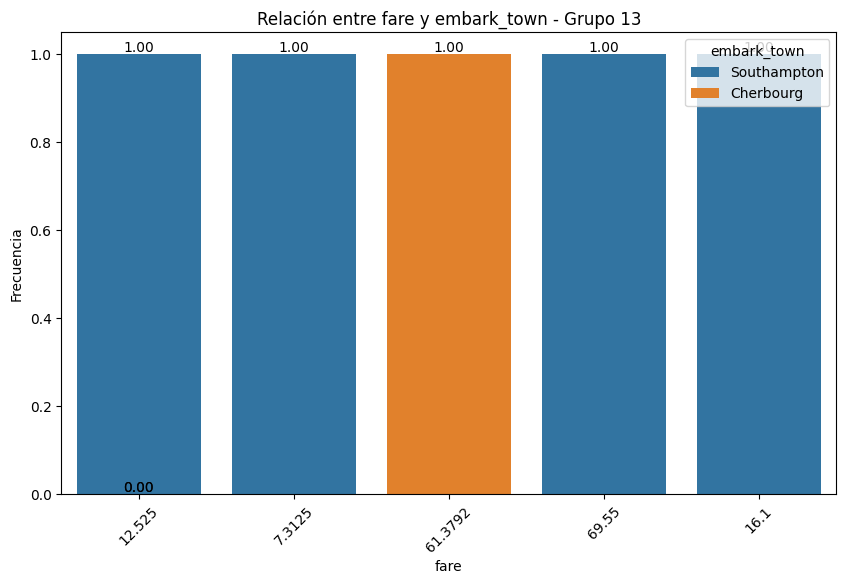

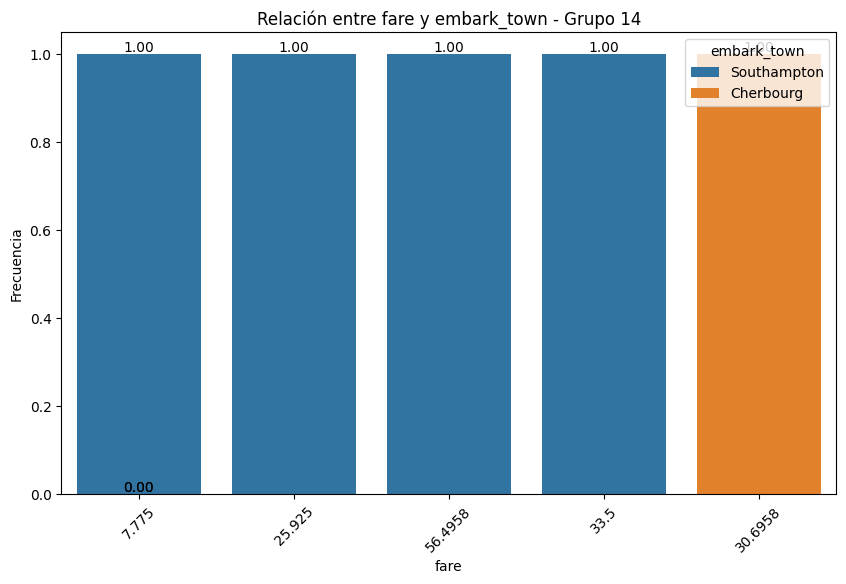

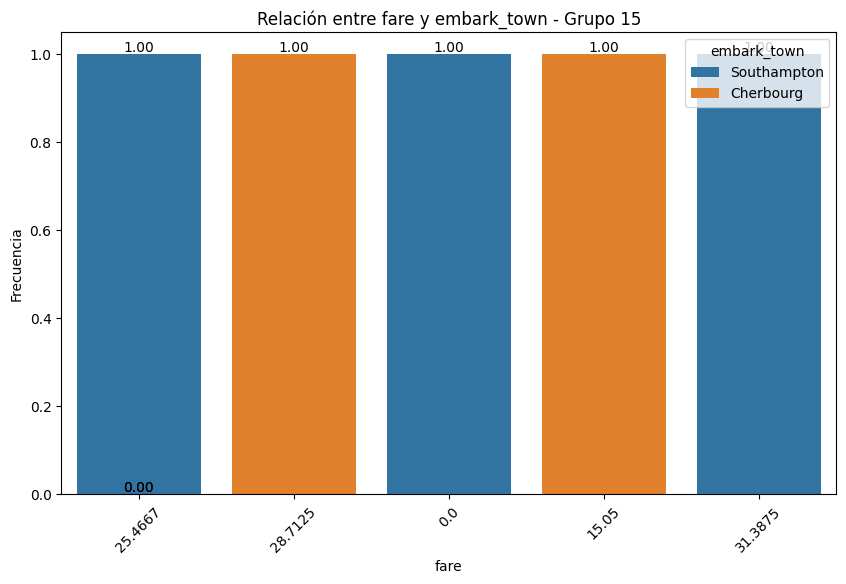

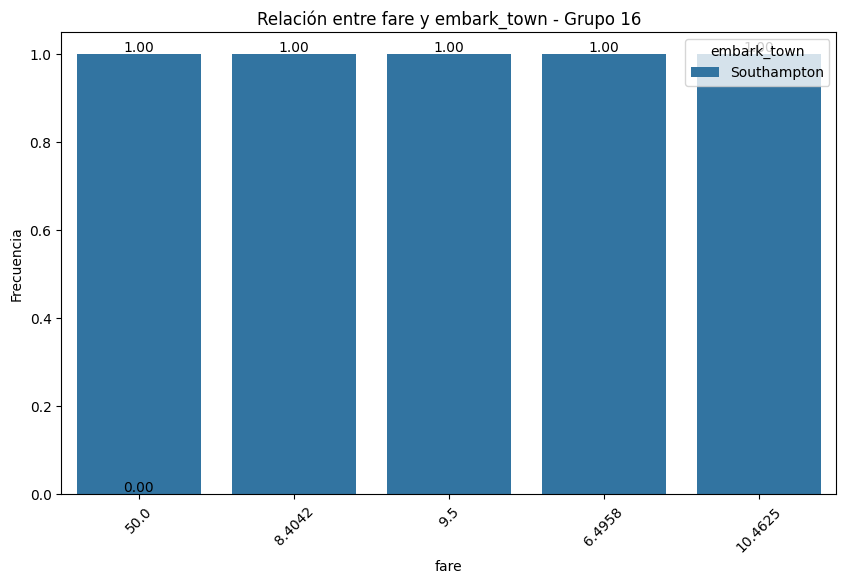

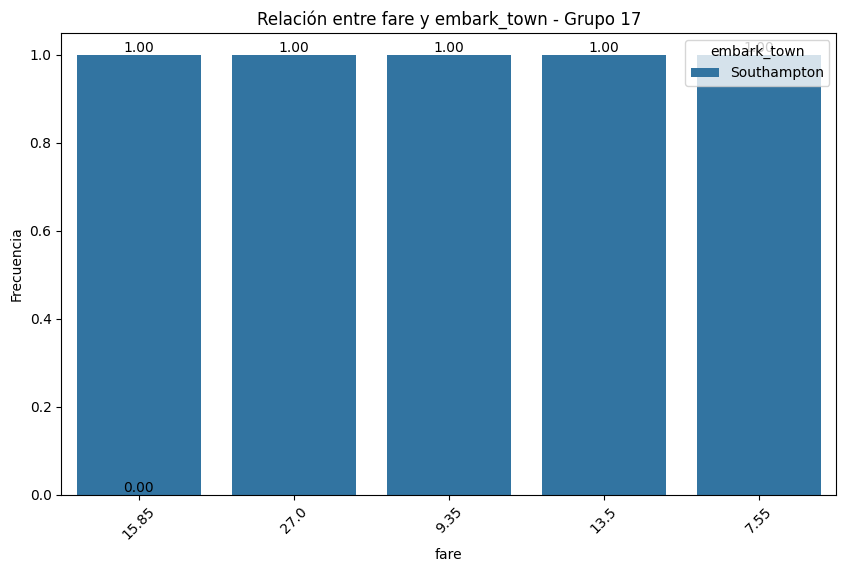

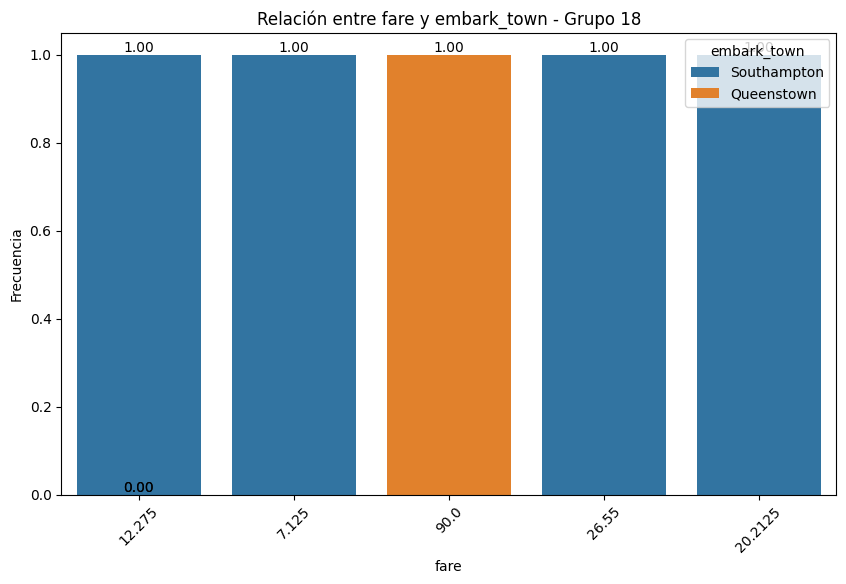

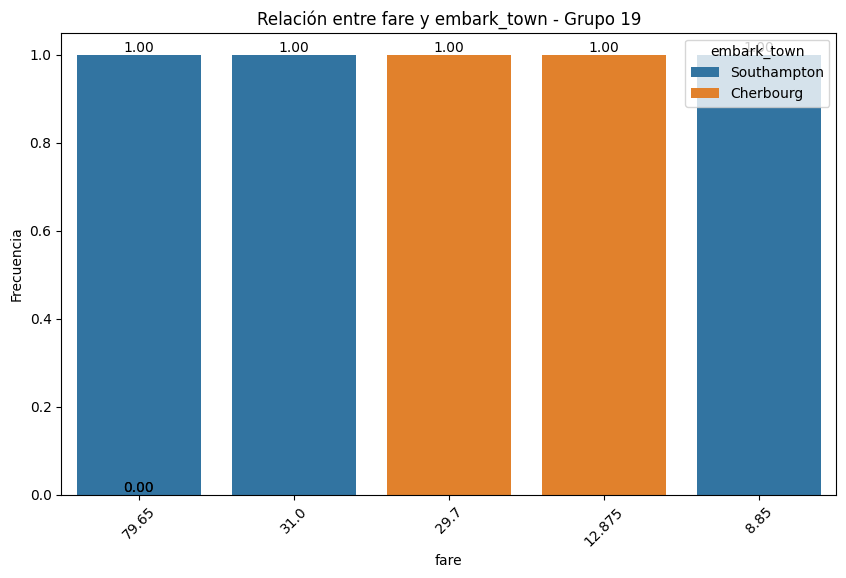

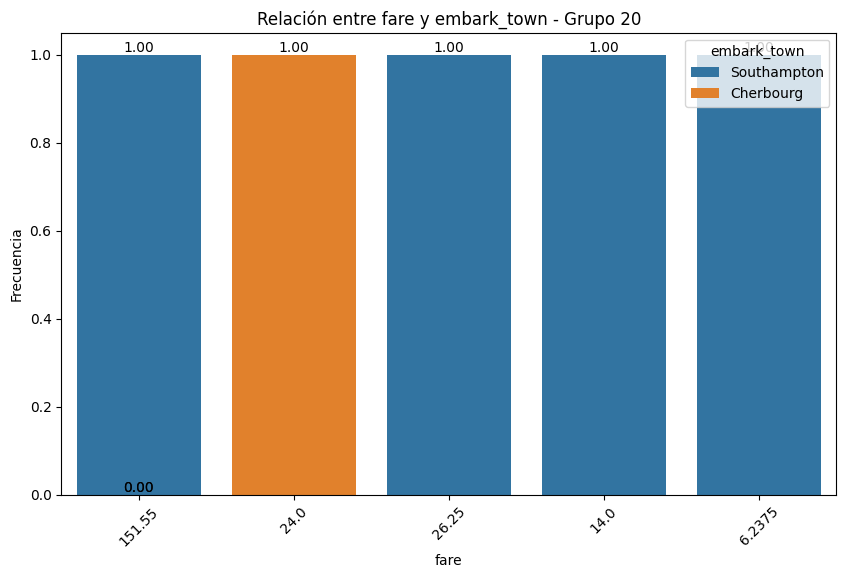

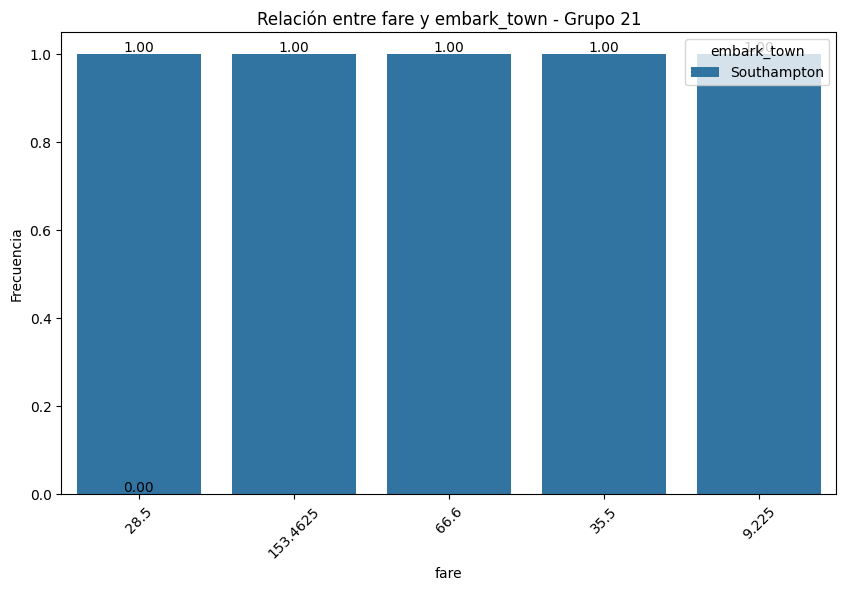

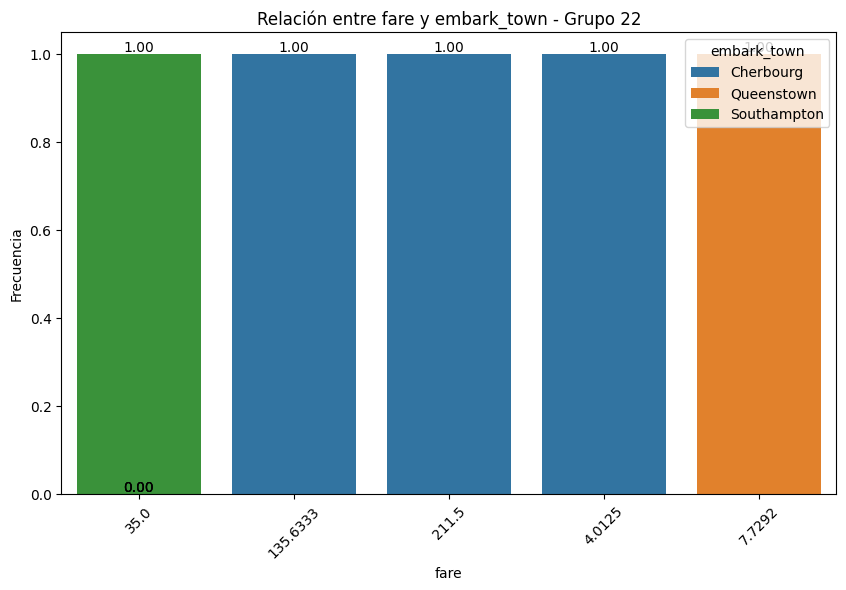

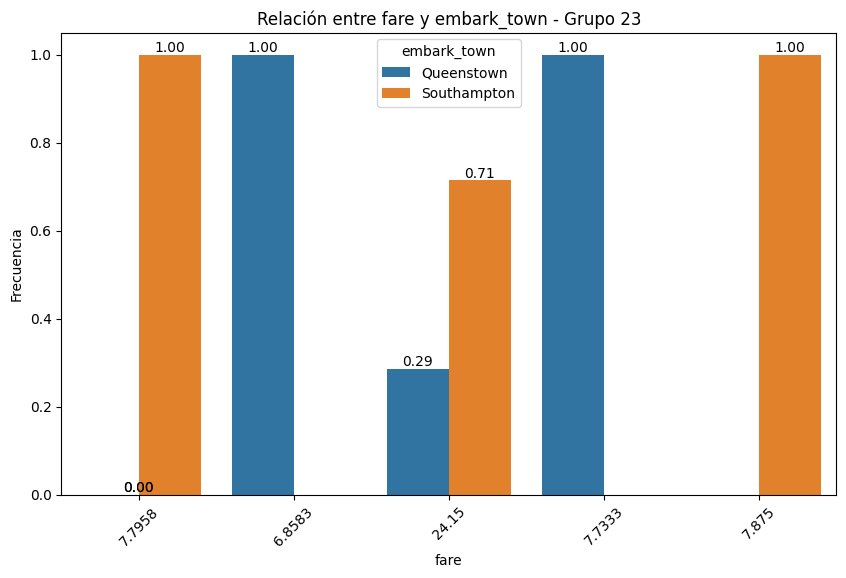

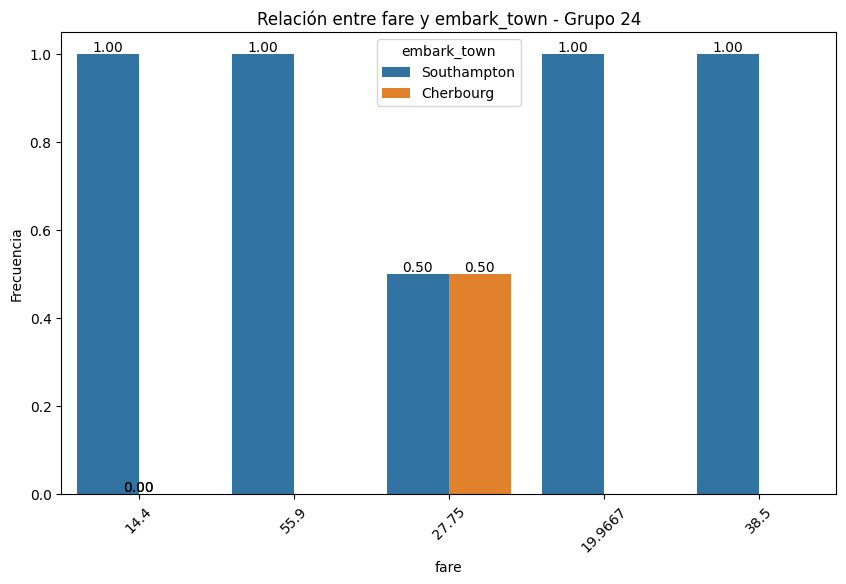

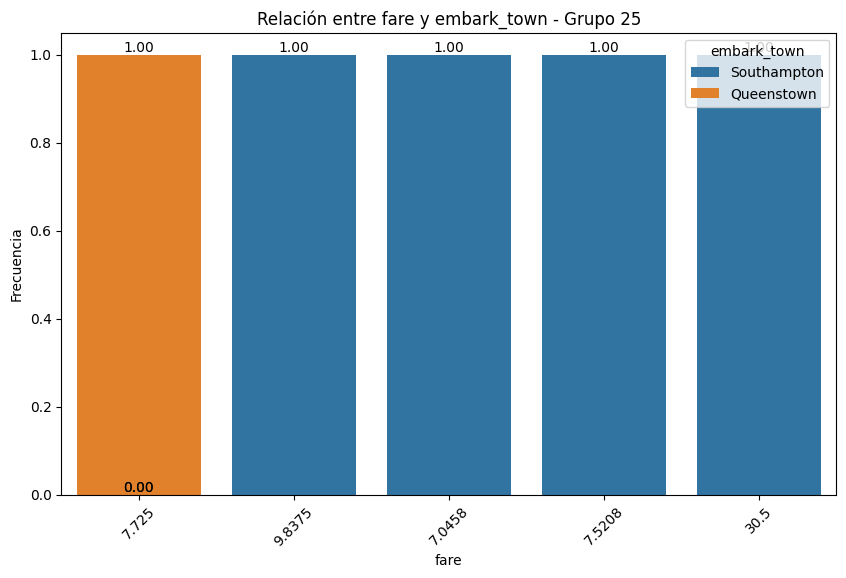

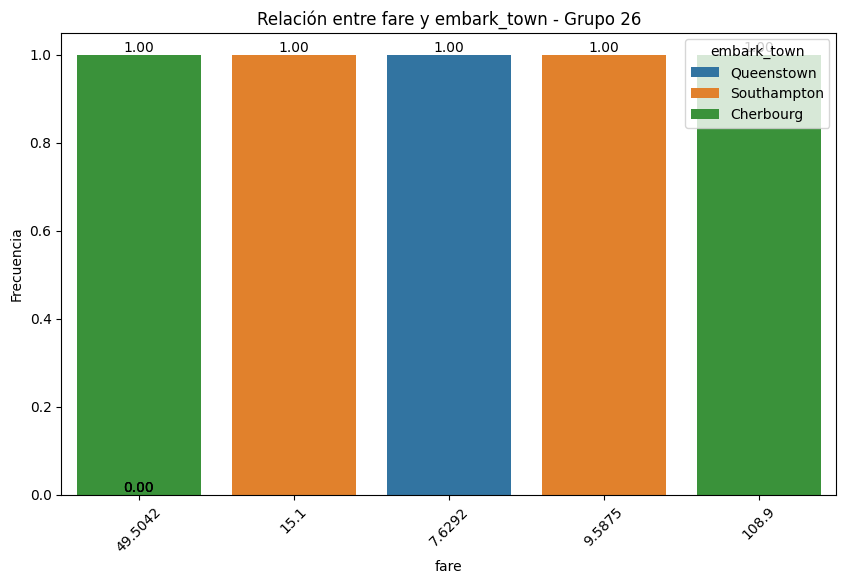

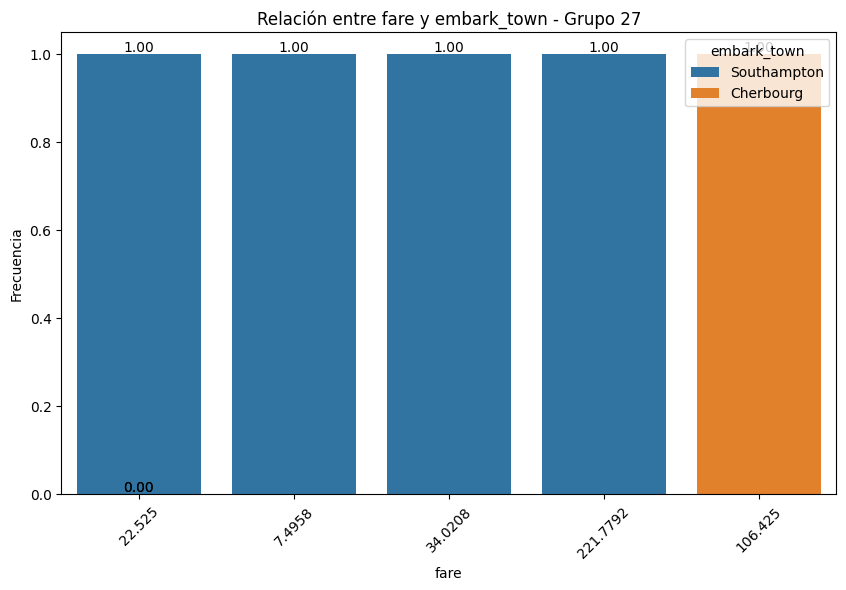

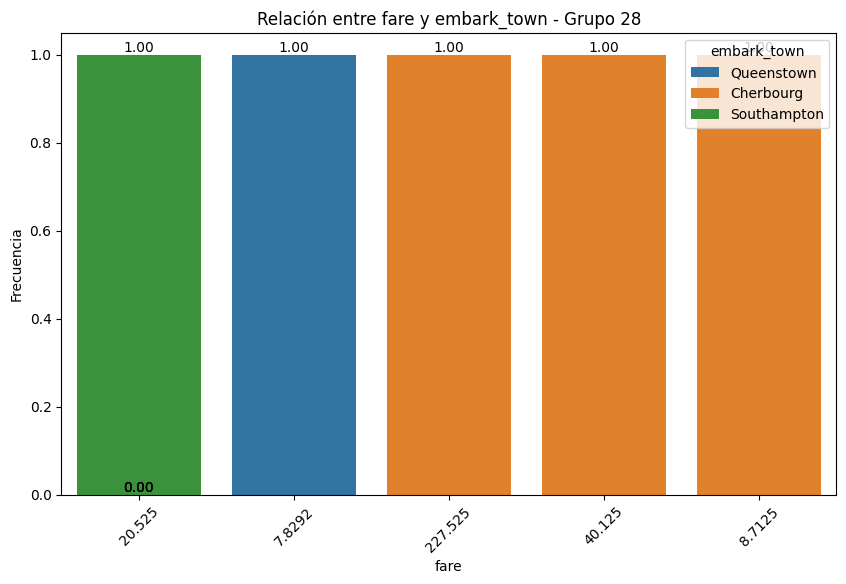

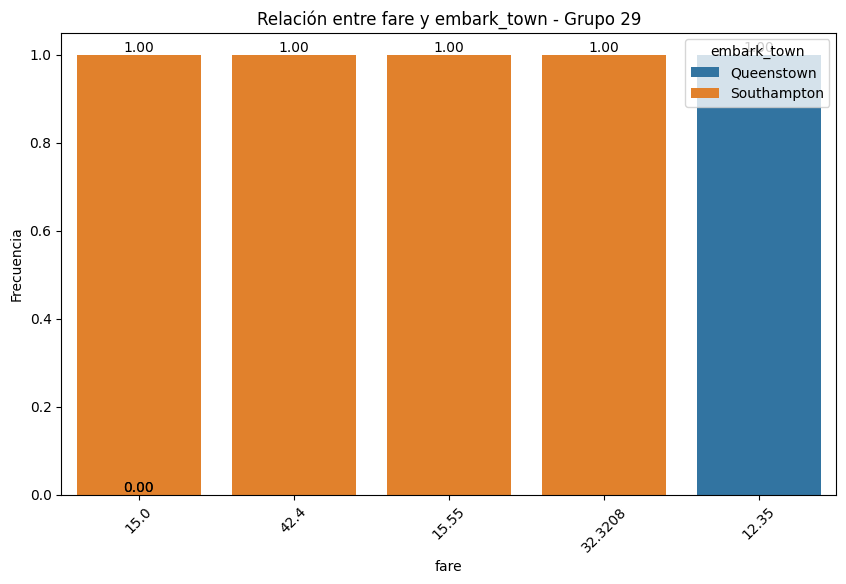

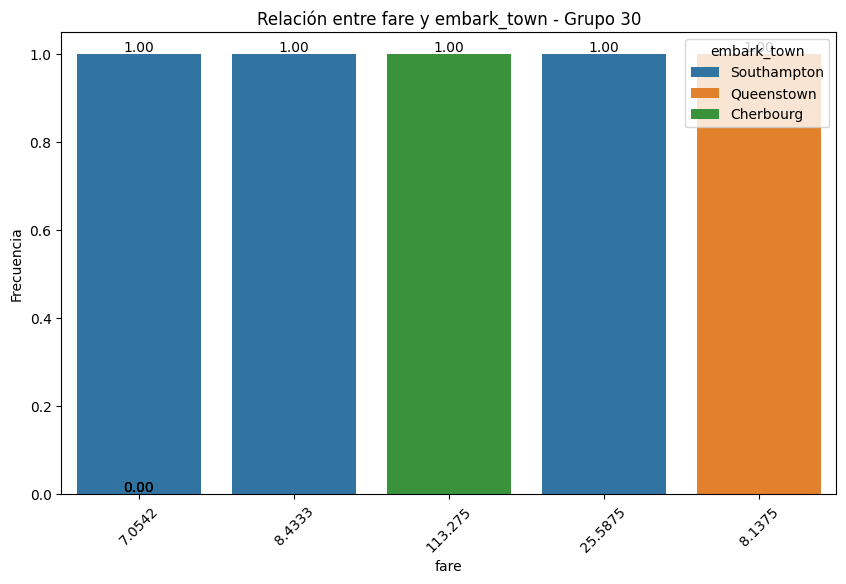

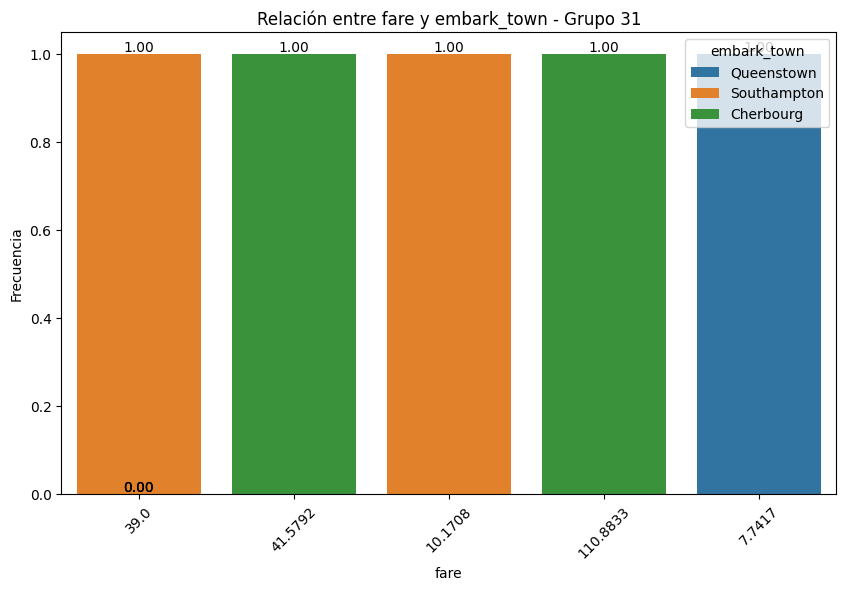

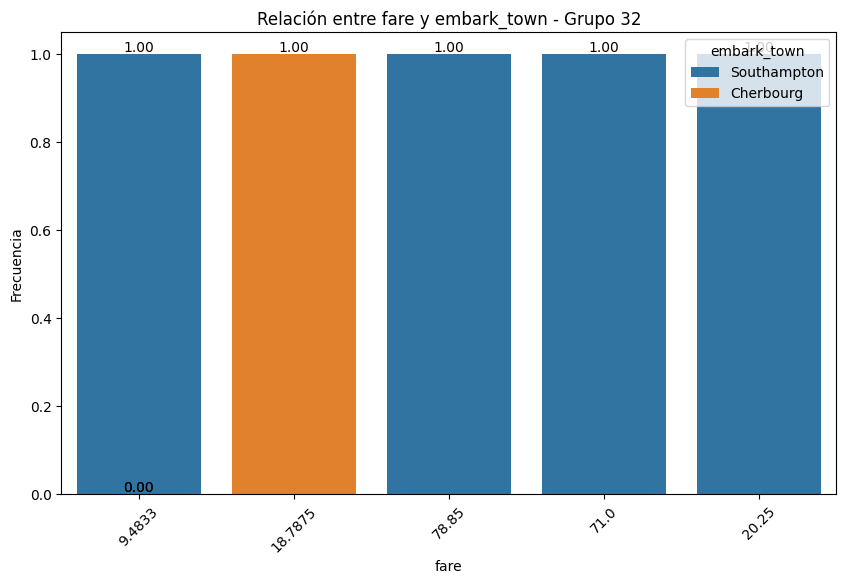

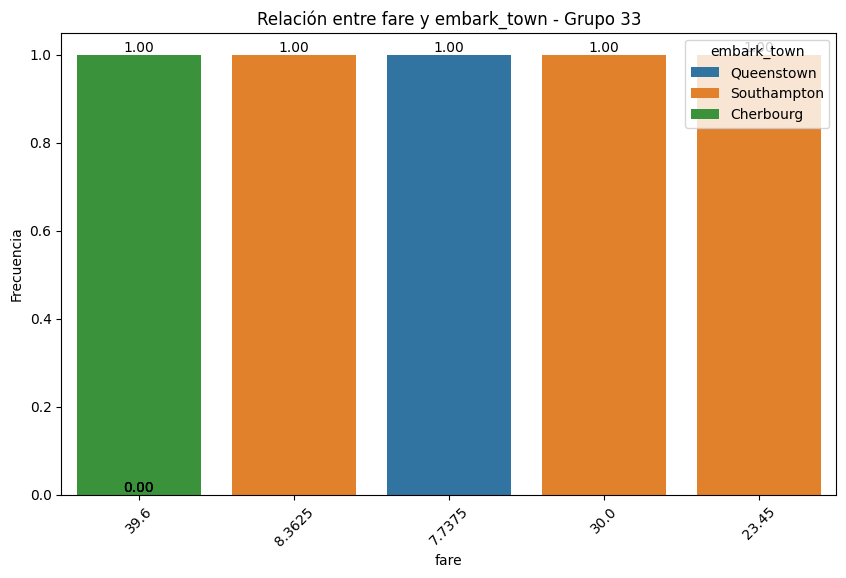

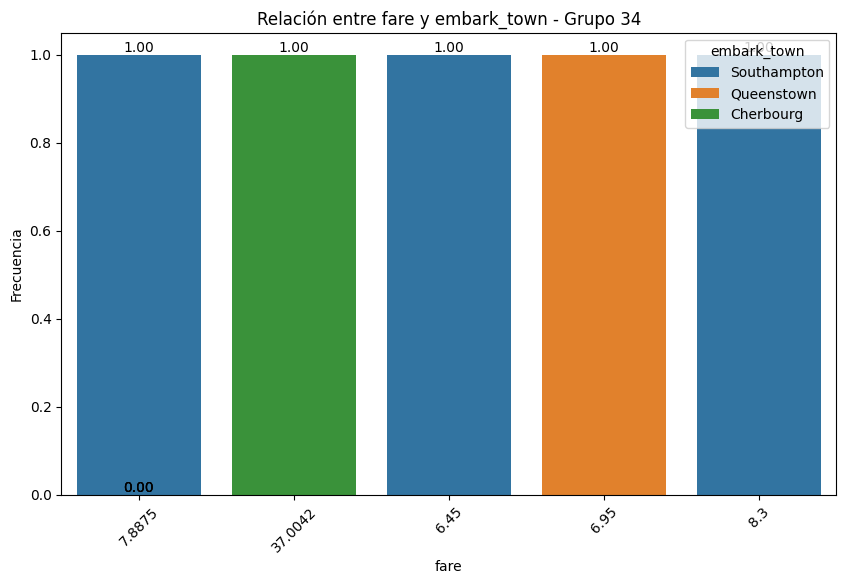

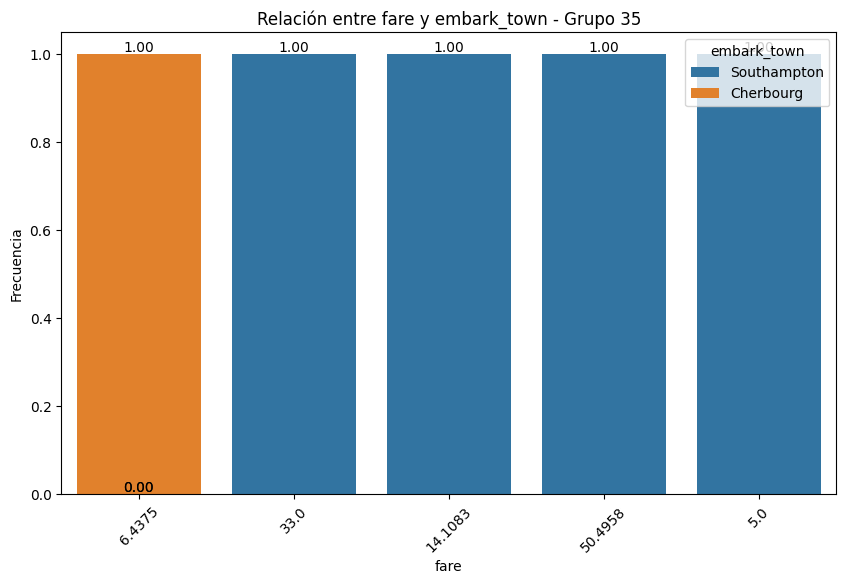

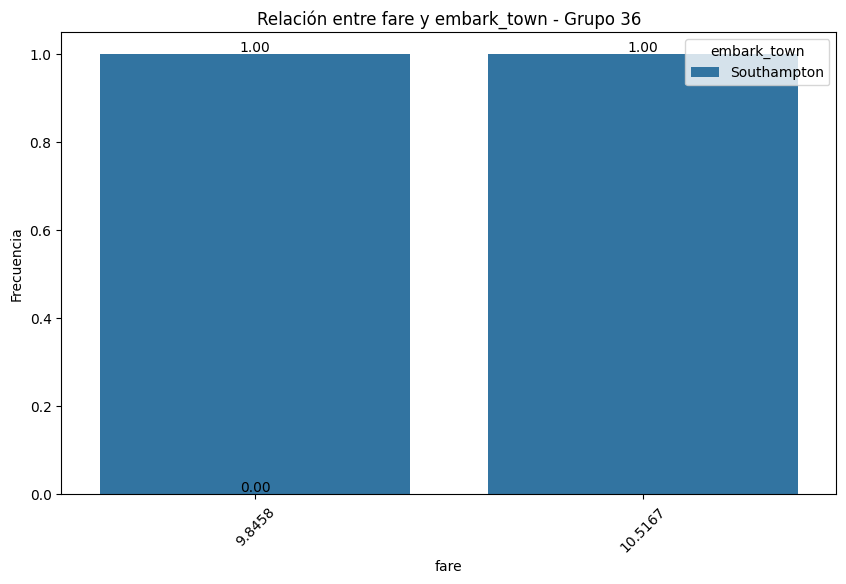

Respuesta yes:


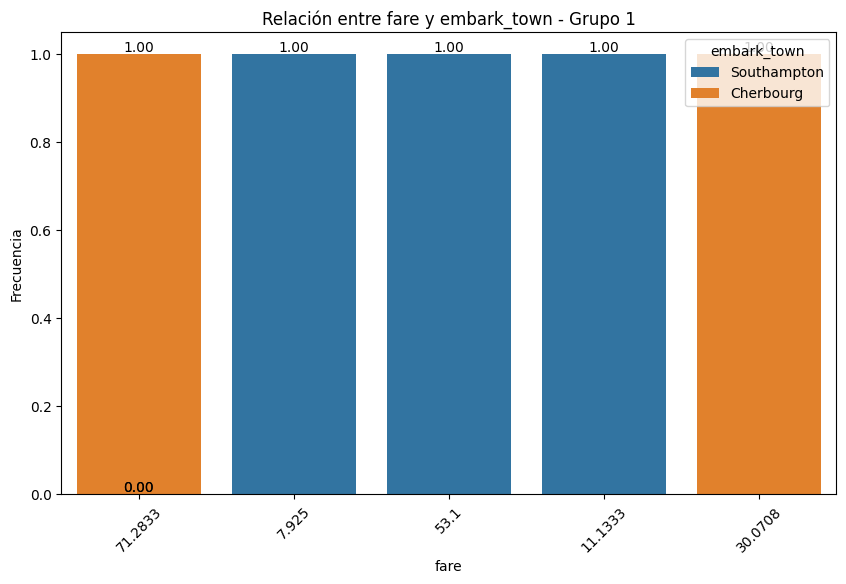

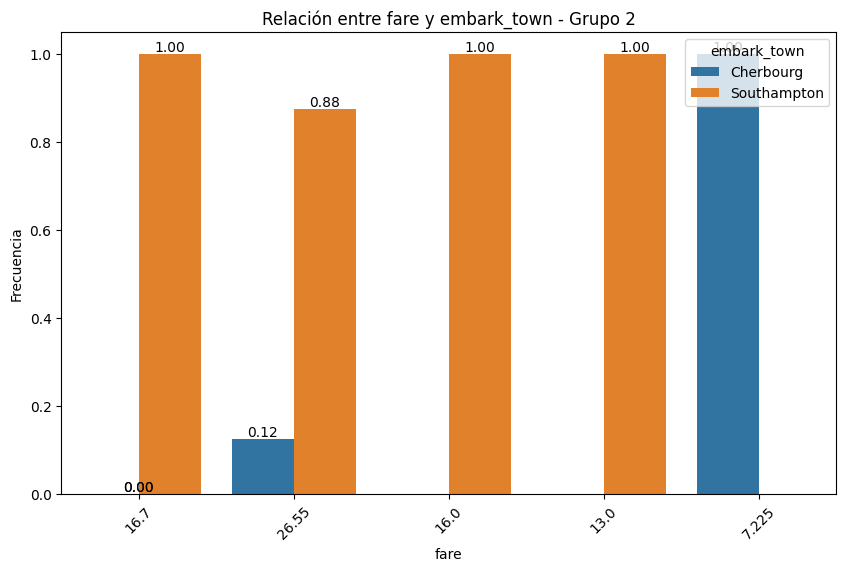

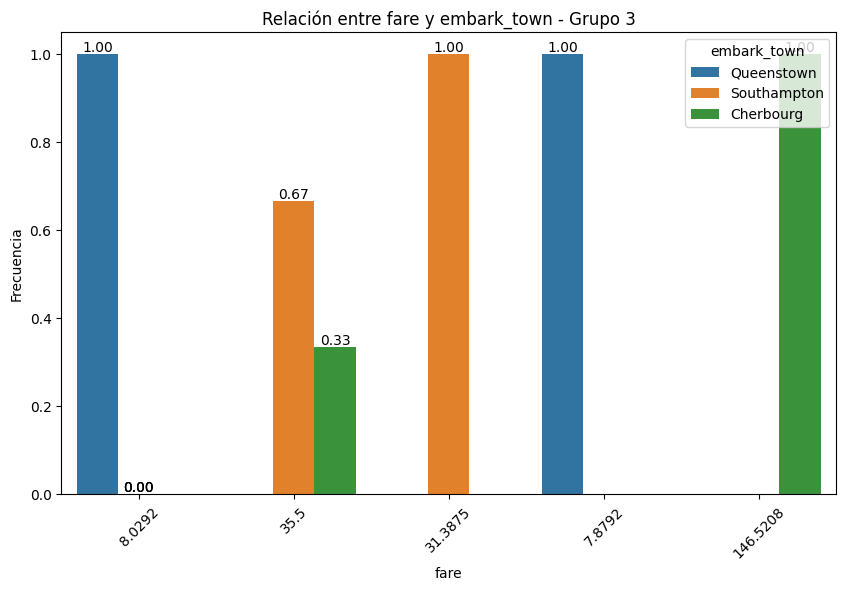

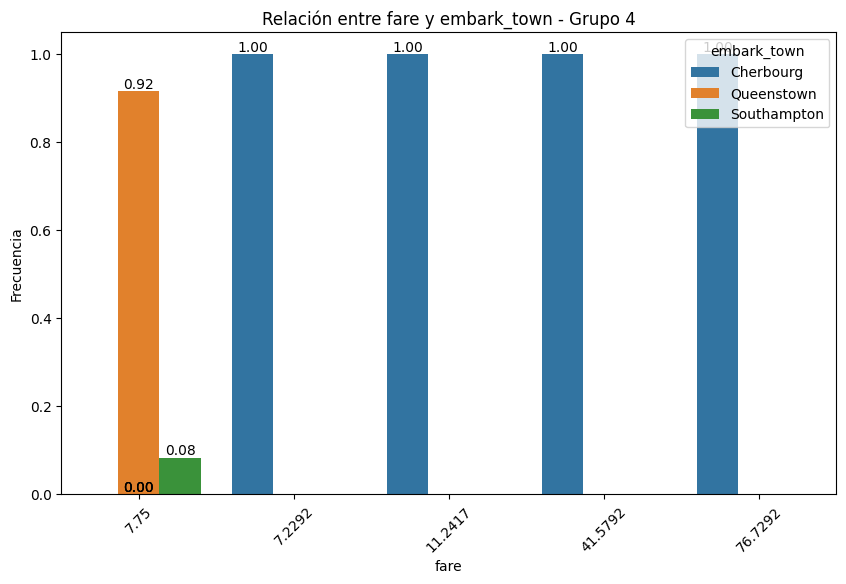

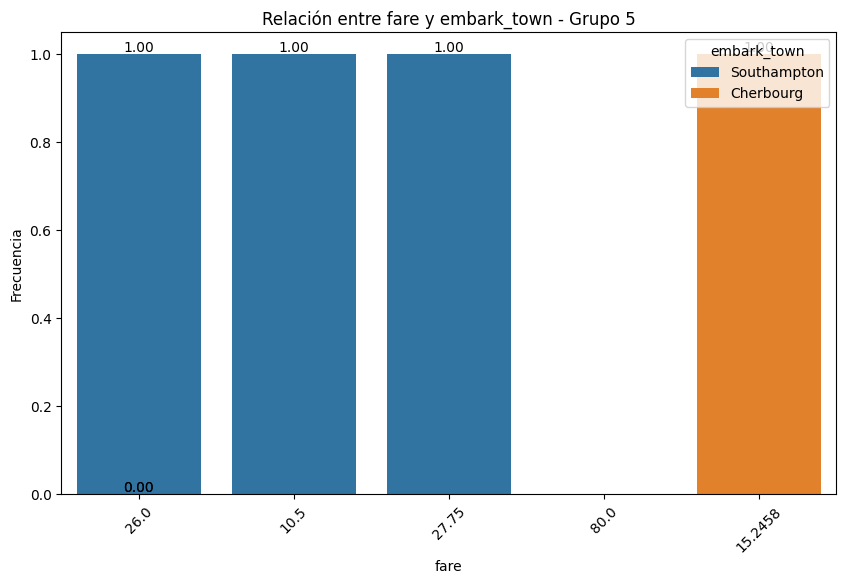

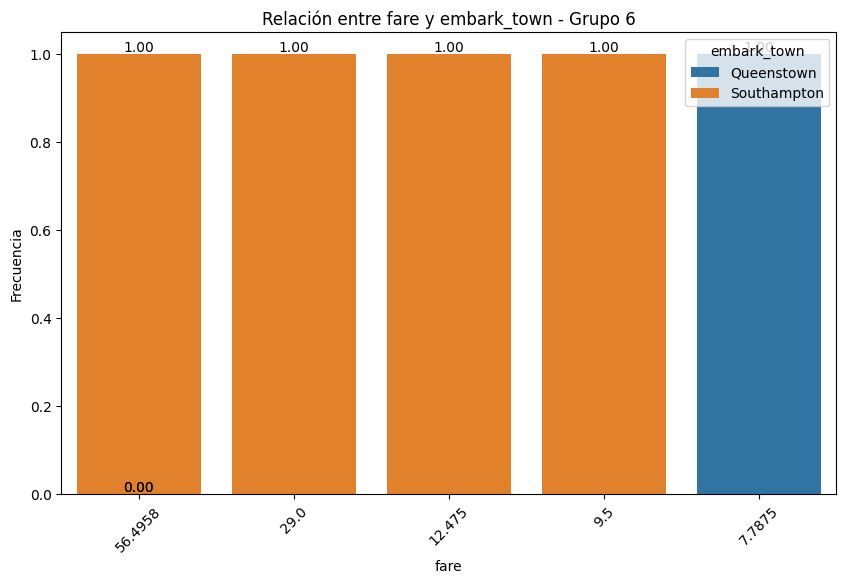

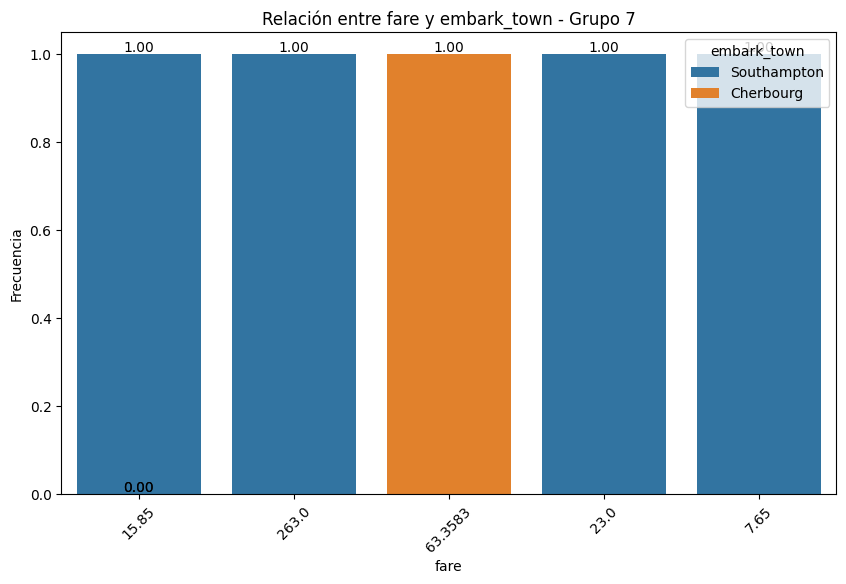

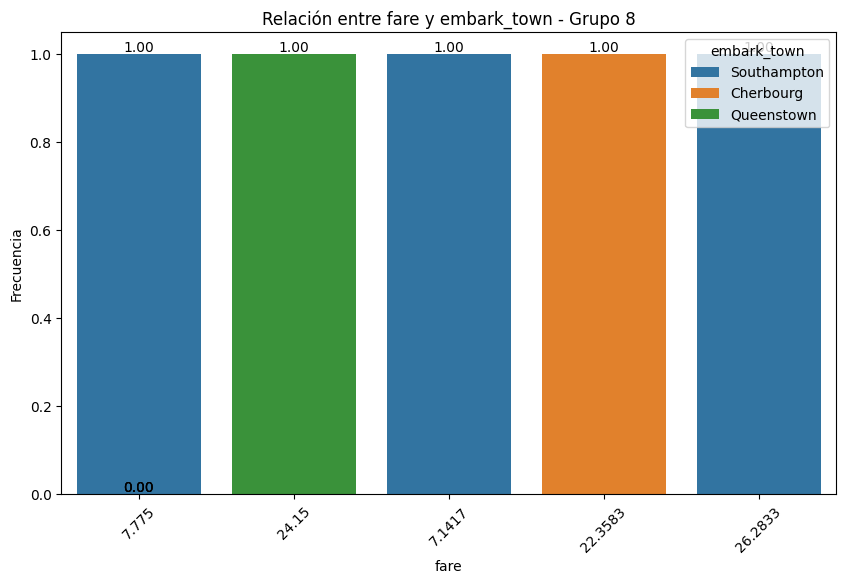

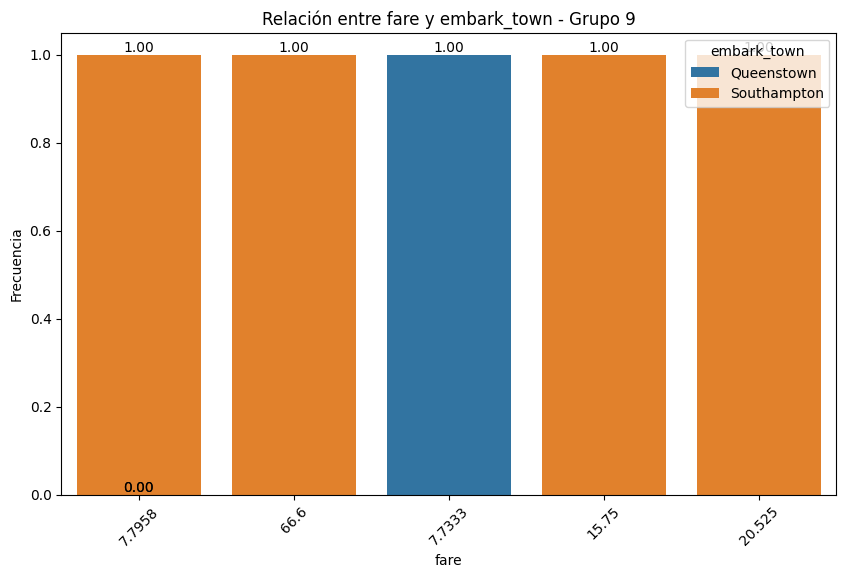

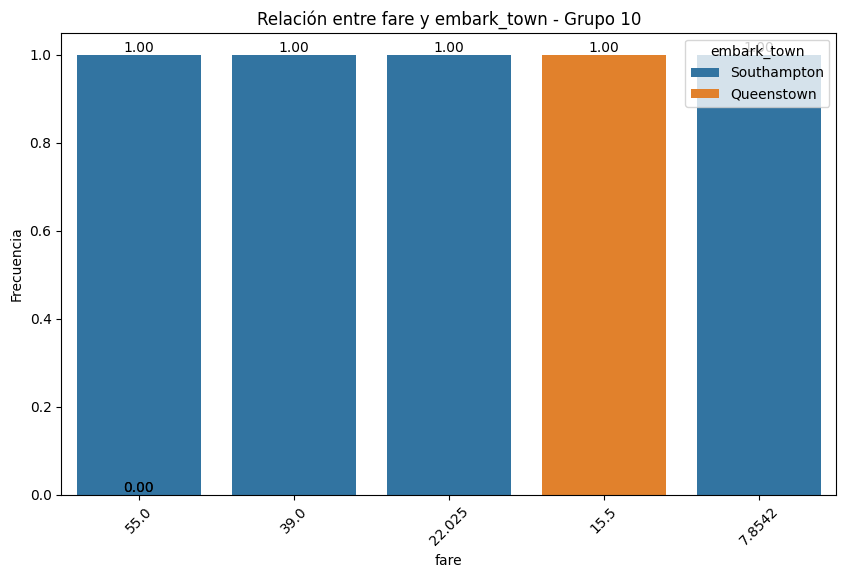

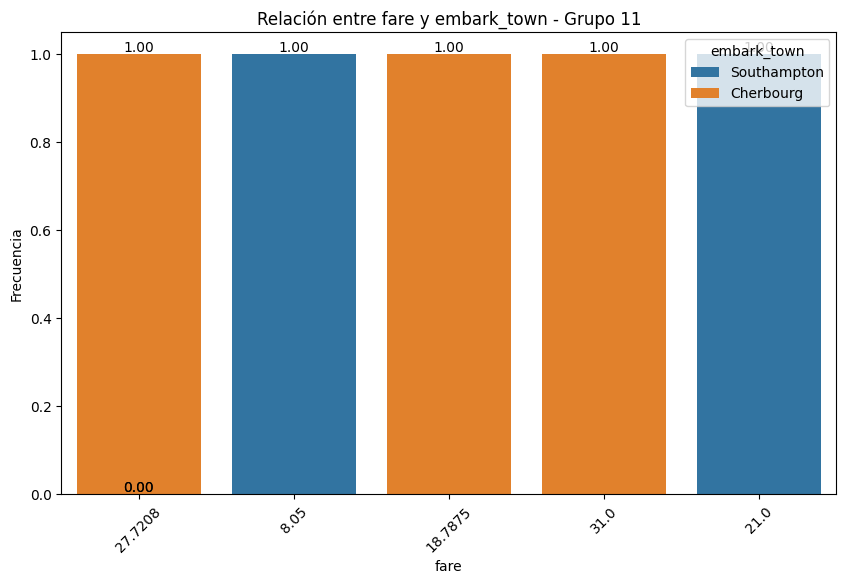

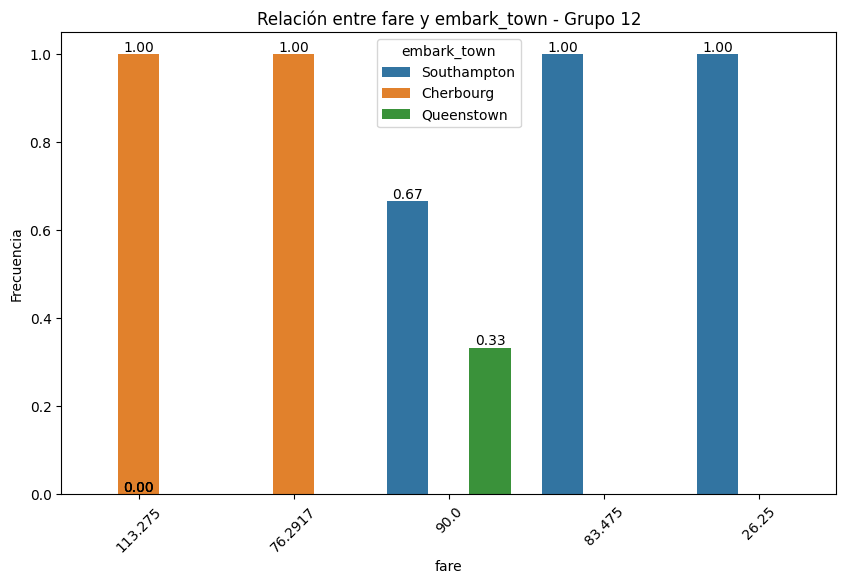

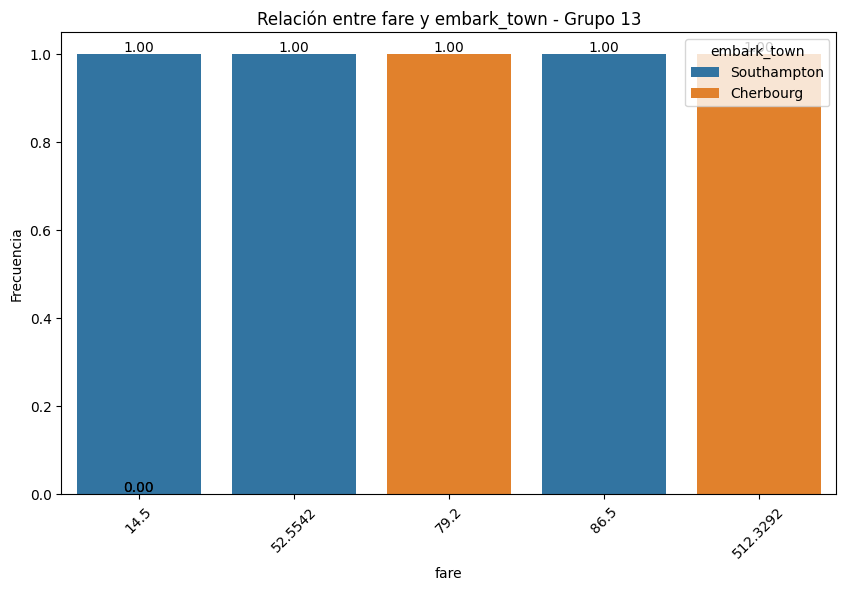

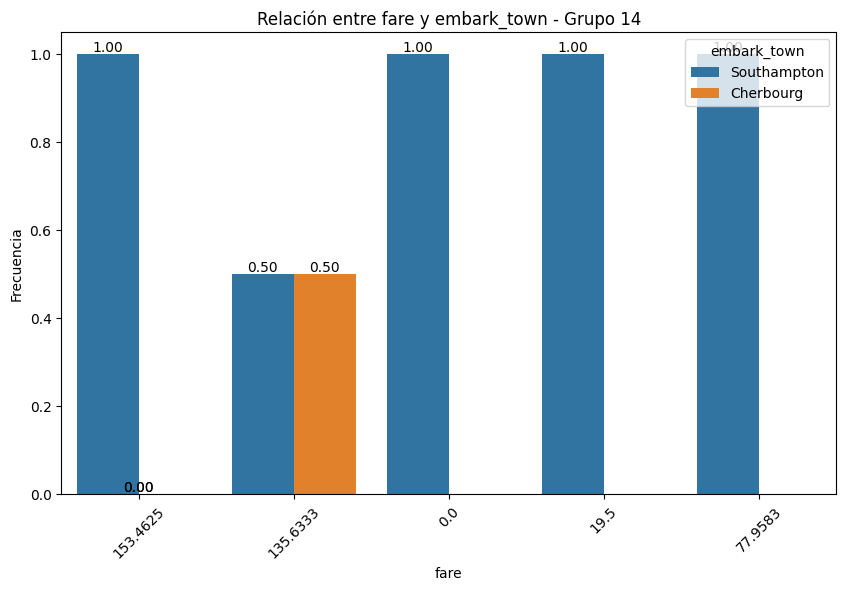

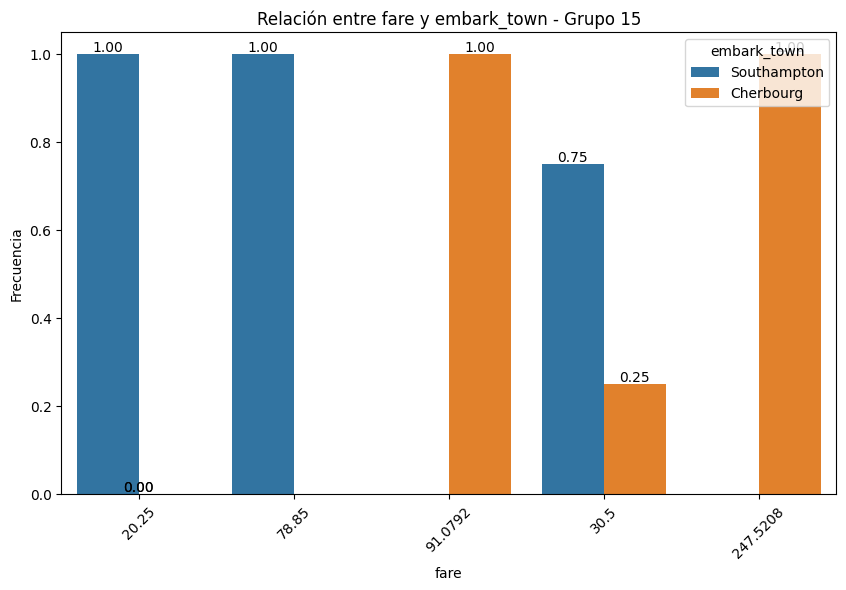

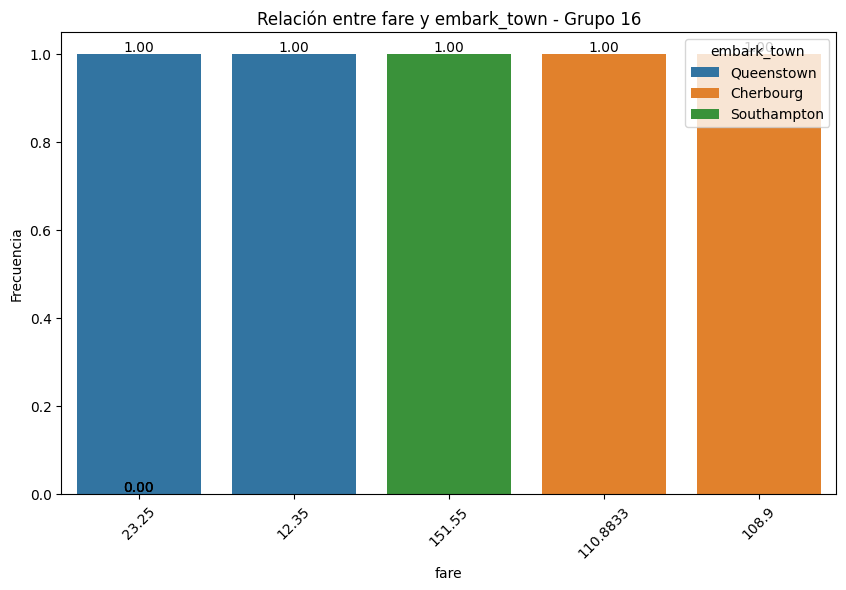

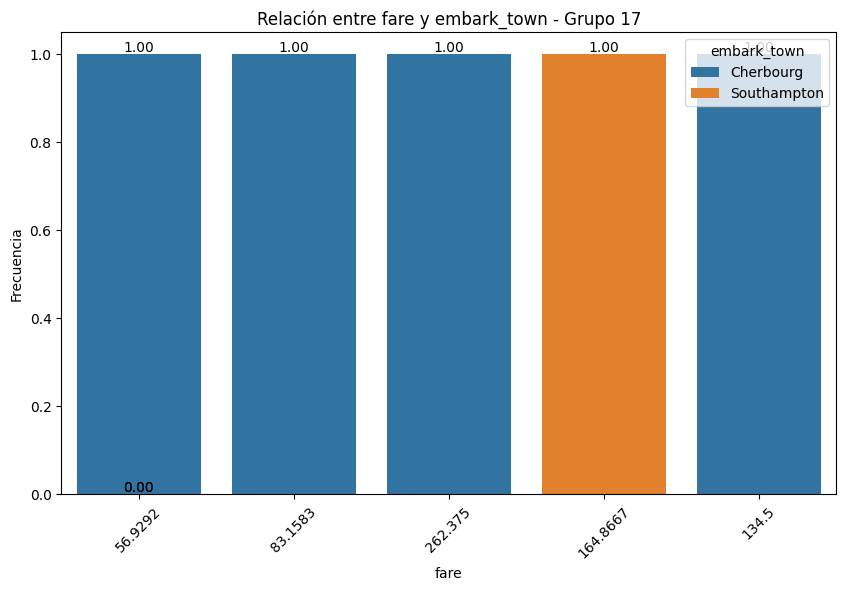

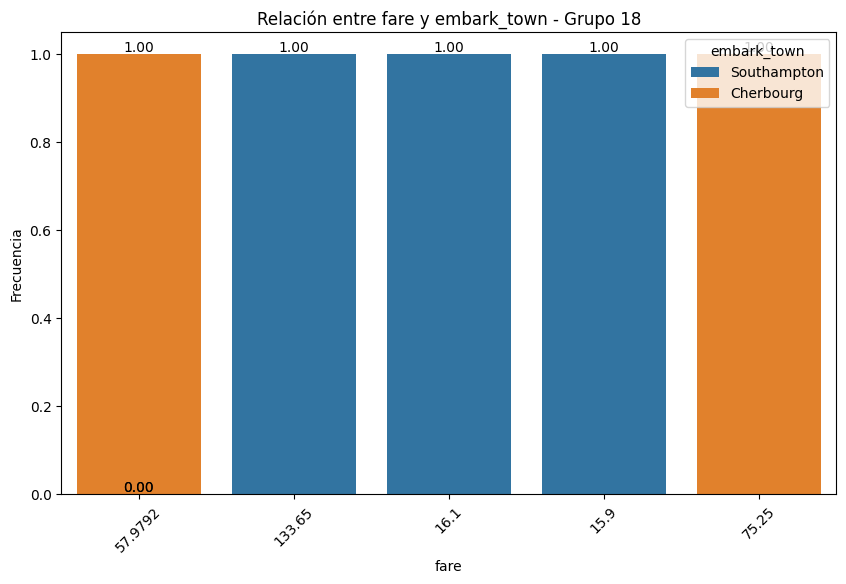

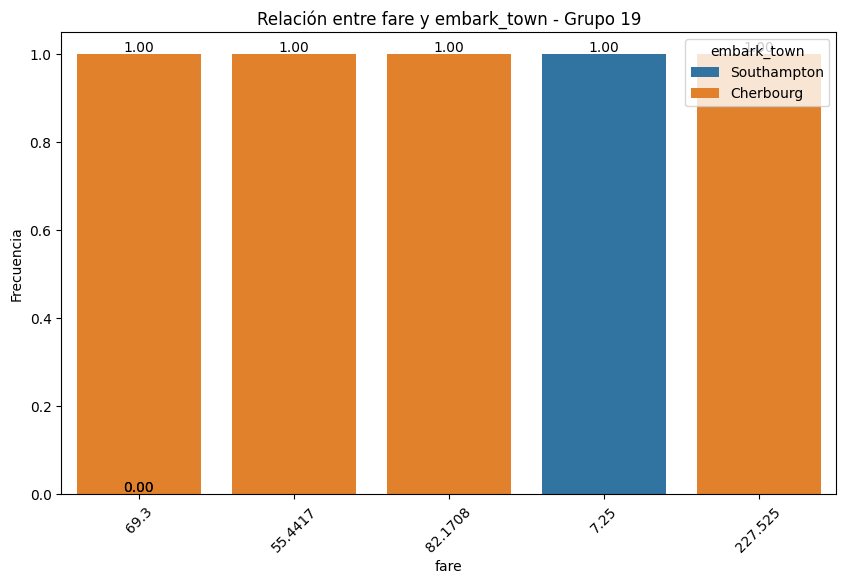

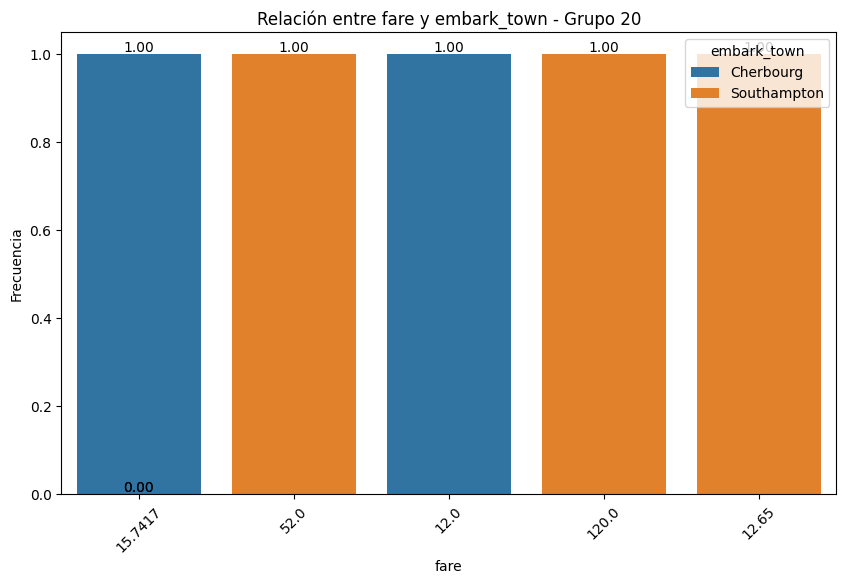

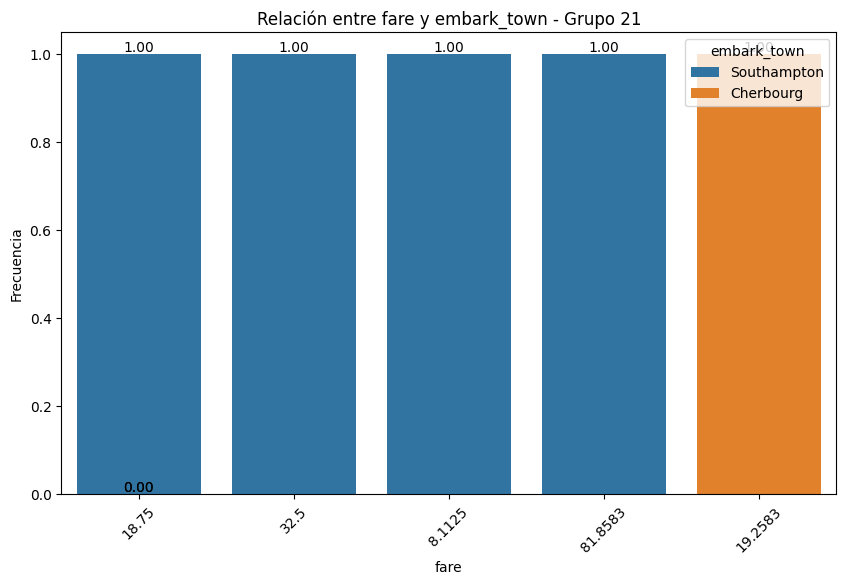

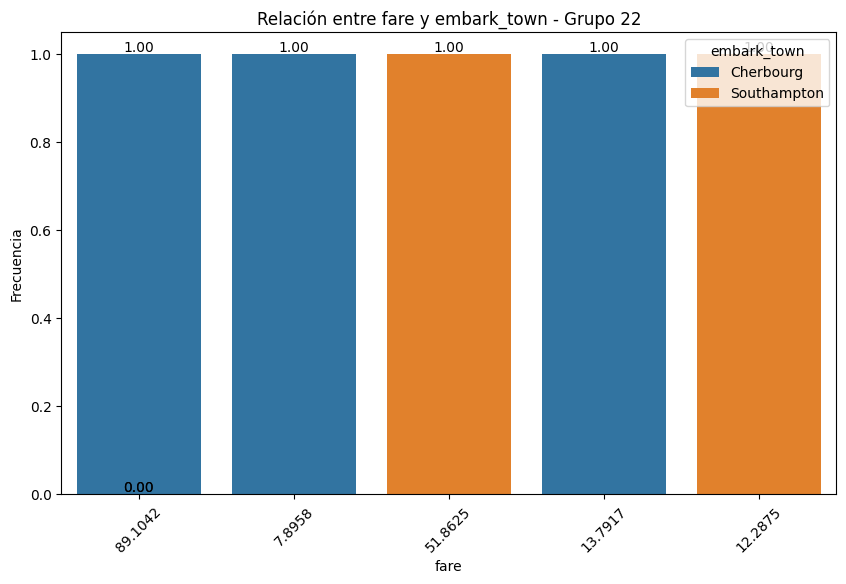

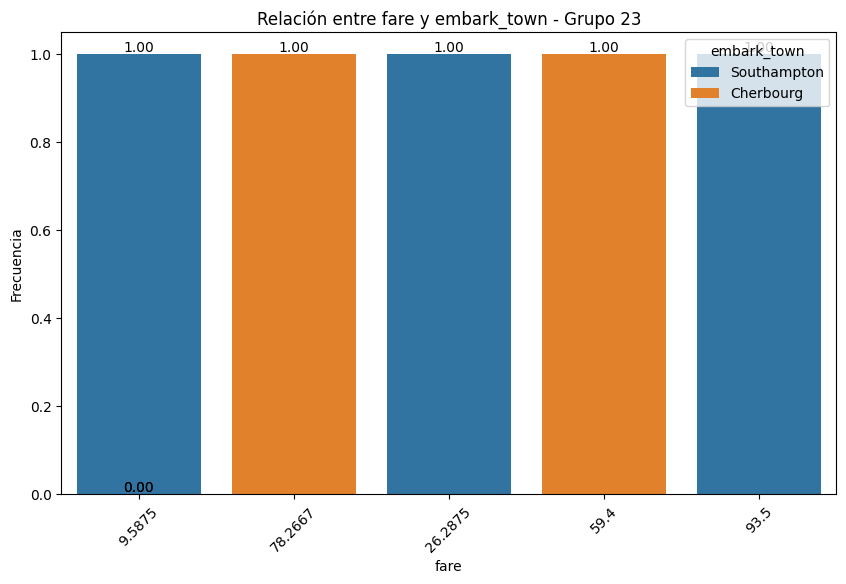

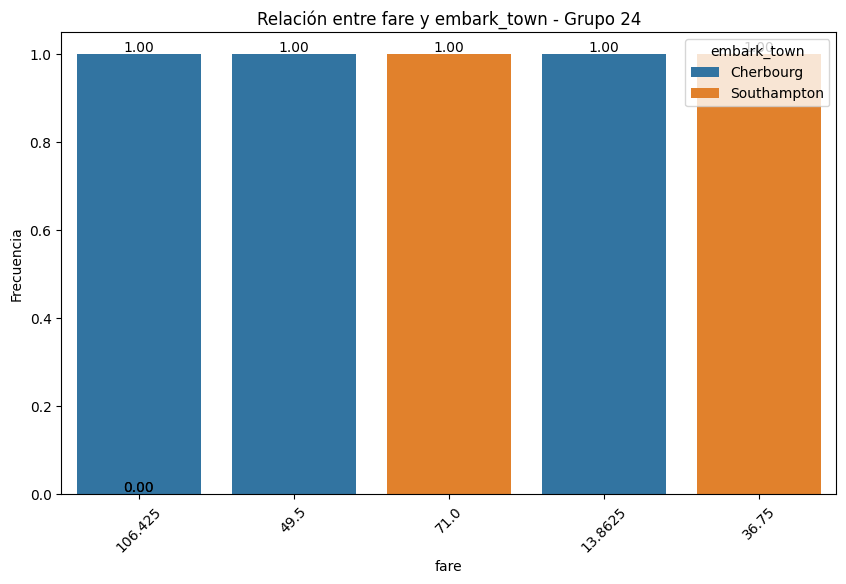

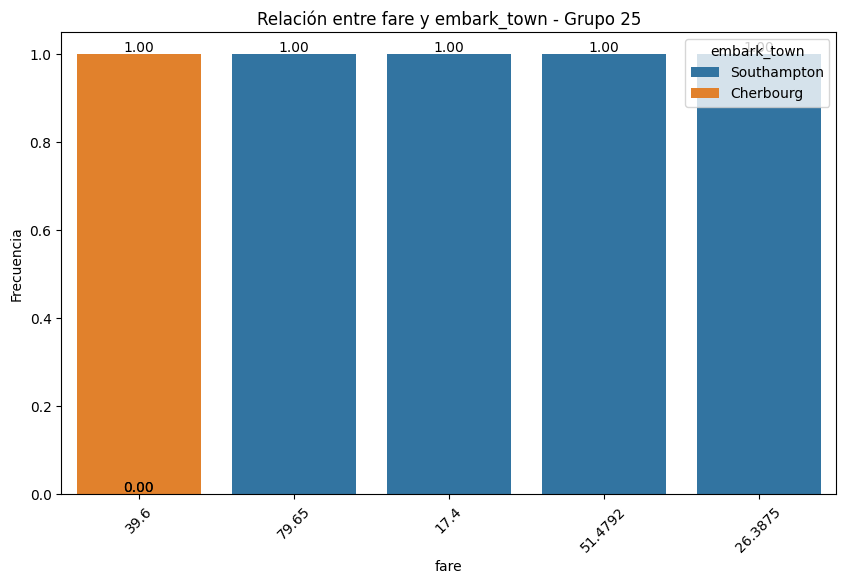

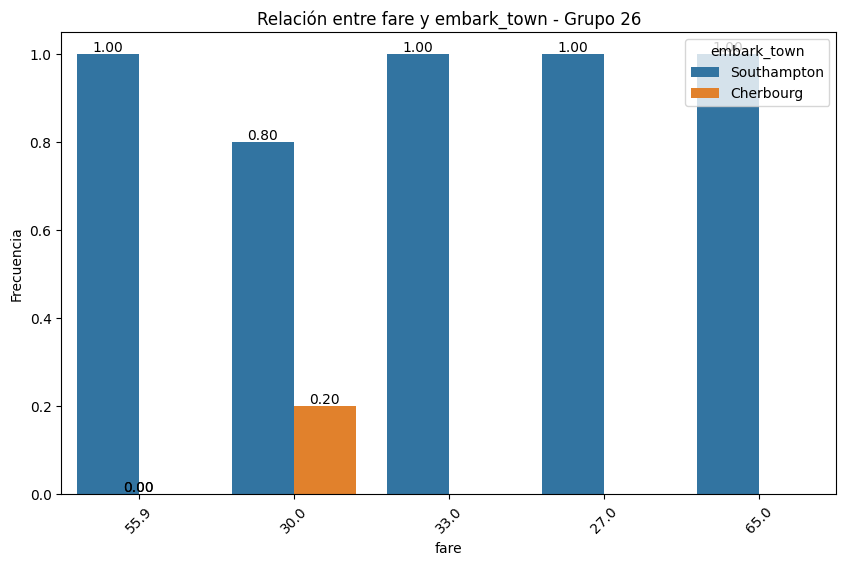

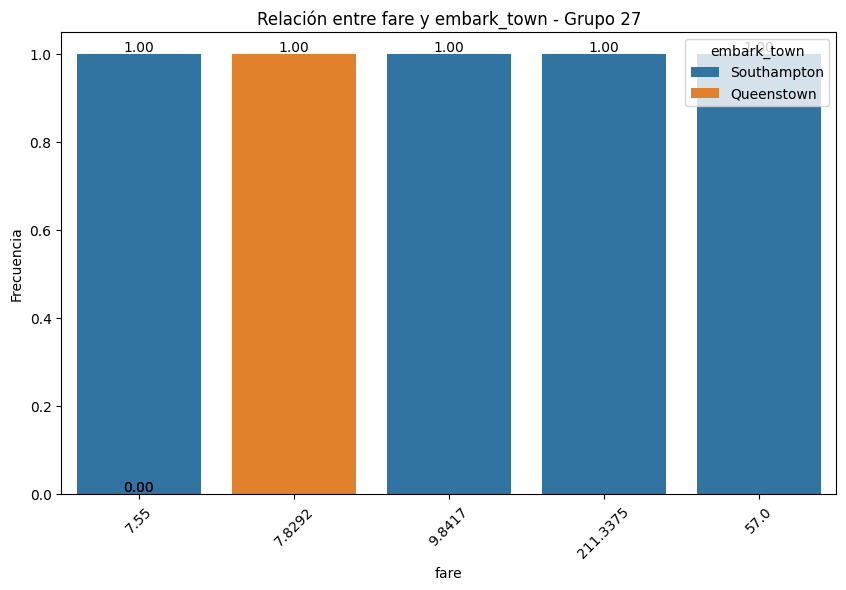

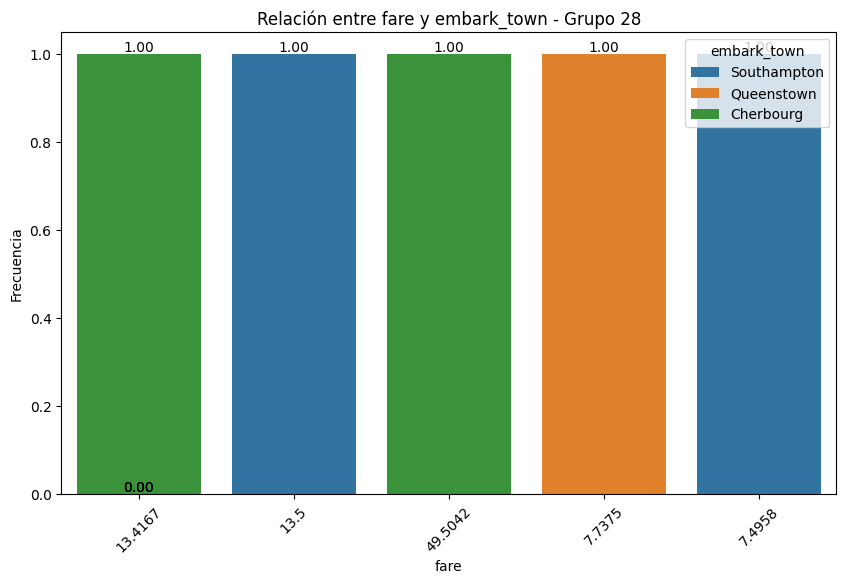

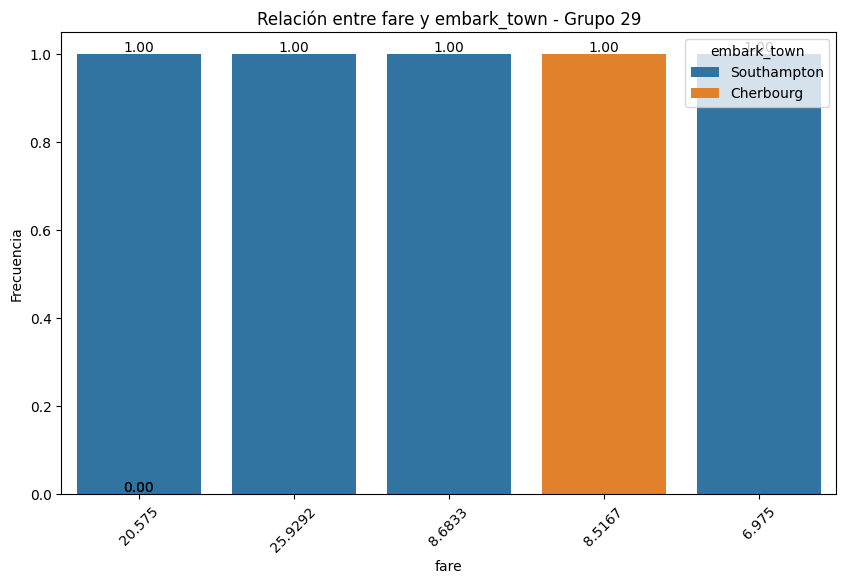

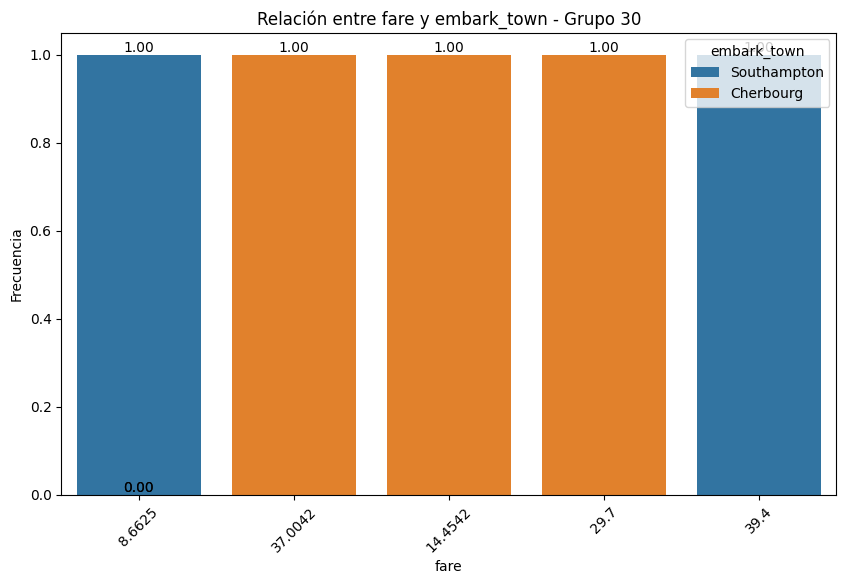

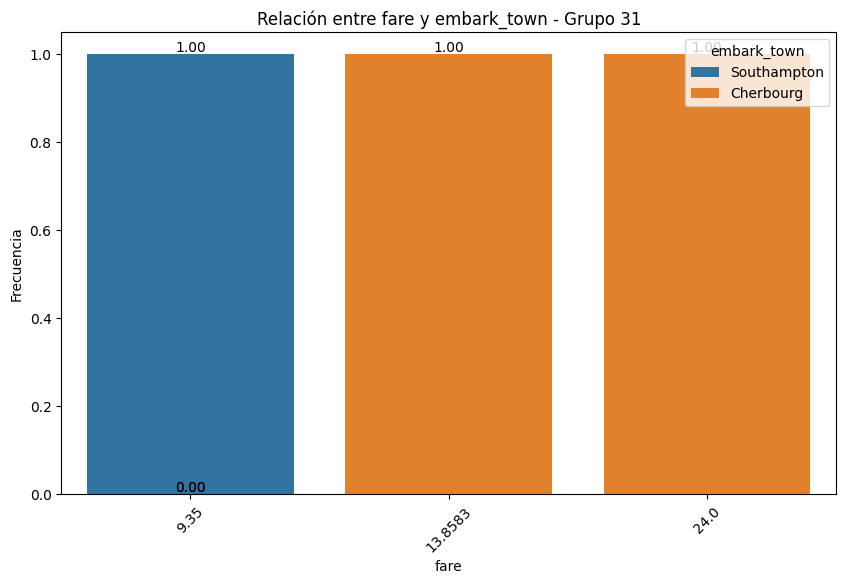

In [85]:
for valor,df in diccionario_multivariante.items():
 print(f"Respuesta {valor}:")
 plot_categorical_relationship_fin(df,col_2,col_1, relative_freq= True, show_values= True)

In [ ]:
# Revisar!!!

In [ ]:
#7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

In [88]:
columnas_2 = ["alive","class","age"] 
col_directora_2 = "alive"
col_1_2 = [col for col in columnas_2 if col != col_directora_2][0]
col_2_2 = [col for col in columnas_2 if col != col_directora_2][1]
diccionario_multivariante_2 = {}
for valor in df[col_directora_2].unique():
 diccionario_multivariante_2[valor] = df.loc[df[col_directora_2] ==valor,[col_2_2,col_1_2]]

KeyError: 'alive'

In [ ]:
#8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [ ]:
## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [29]:
df_viajes=pd.read_csv("./data/dataset_viajes_jun23.csv")

In [30]:
df_viajes["aircompany"].value_counts()

aircompany
TabarAir      142
MoldaviAir    133
PamPangea     117
FlyQ          108
Airnar        100
Name: count, dtype: int64

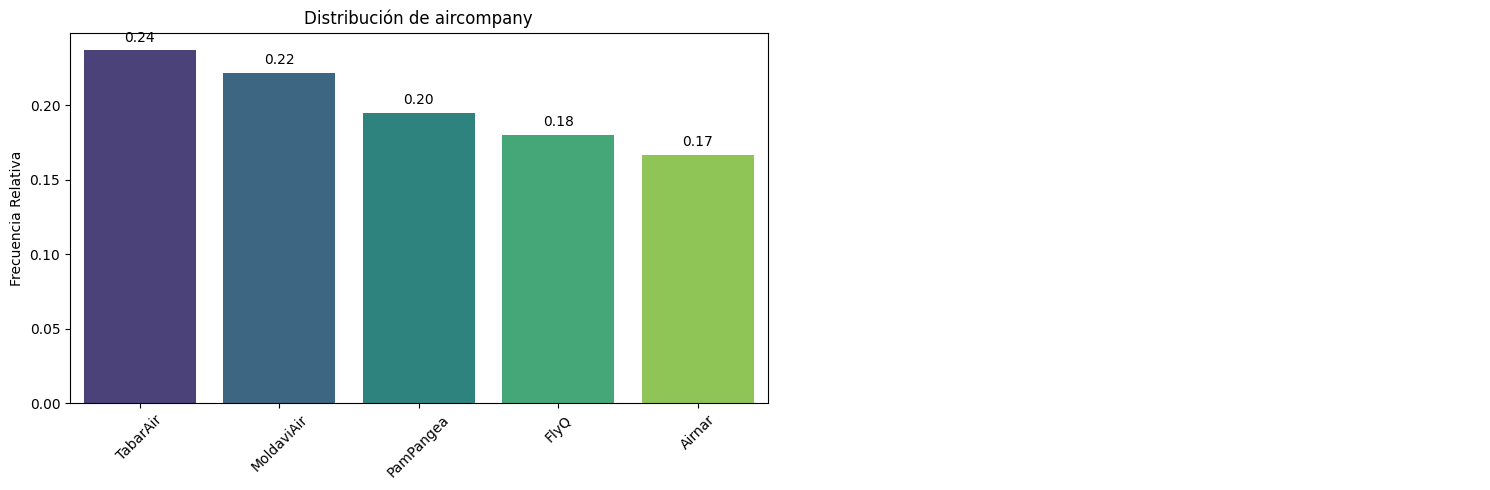

In [31]:
pinta_distribucion_categoricas(df_viajes,["aircompany"], relativa= True, mostrar_valores= True)

In [33]:
df_viajes.groupby("aircompany")["ingresos"].describe()

count           mean            std       min          25%  \
aircompany                                                               
Airnar      100.0  405293.978200  269583.848420  14232.65  185270.6000   
FlyQ        108.0  401619.008056  295633.712828  23498.34  237556.9525   
MoldaviAir  133.0  548077.209098  374577.838426  11797.85  178872.9000   
PamPangea   117.0  478417.048718  364458.092328  12383.21  163124.5300   
TabarAir    142.0  271042.230282  177006.035877  24289.53   95620.5075   

                   50%          75%         max  
aircompany                                       
Airnar      396764.220  608356.1225   958617.02  
FlyQ        366970.685  473901.4325  1081702.91  
MoldaviAir  532426.220  794055.4100  1295515.83  
PamPangea   442668.520  763079.0200  1083591.01  
TabarAir    258379.745  398147.1925   623089.41

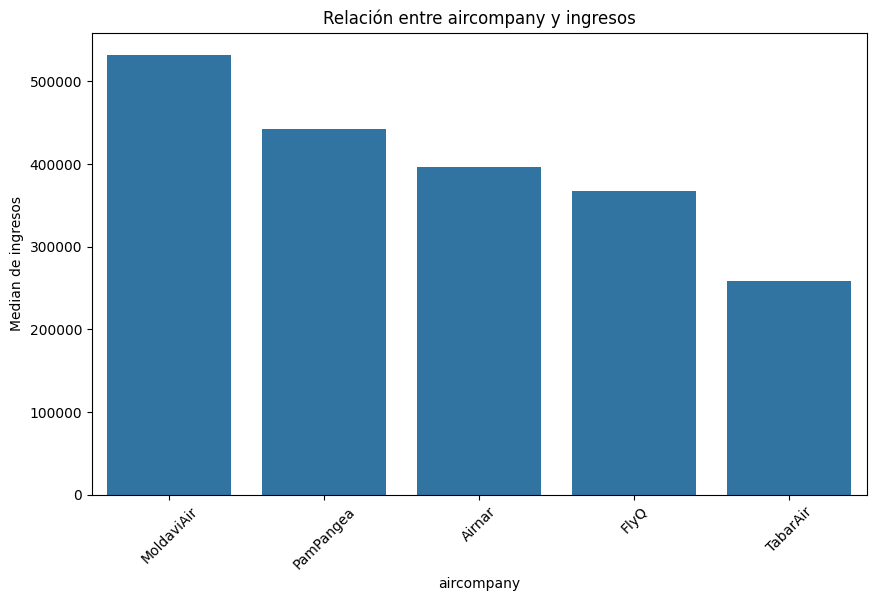

In [34]:
plot_categorical_numerical_relationship(df_viajes,"aircompany","ingresos",measure="median")

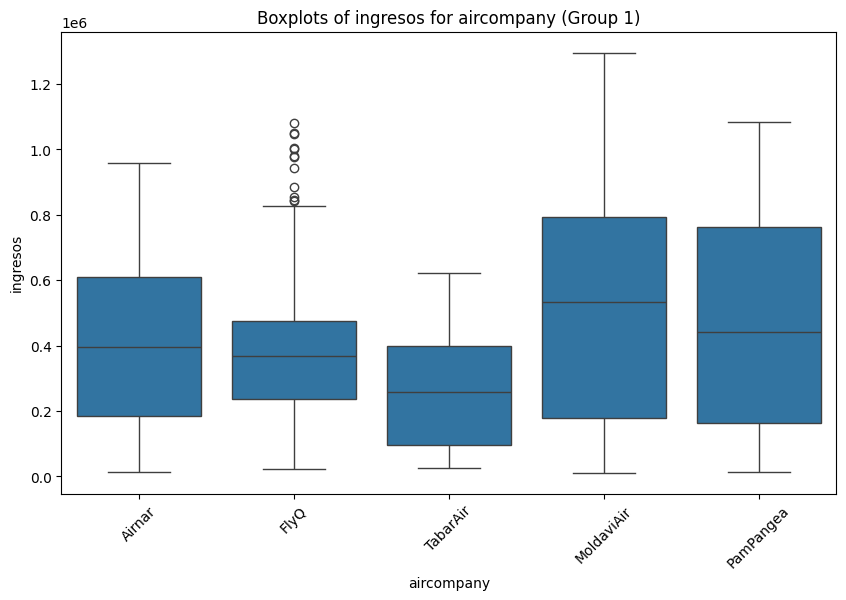

In [35]:
plot_grouped_boxplots(df_viajes,"aircompany","ingresos")

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

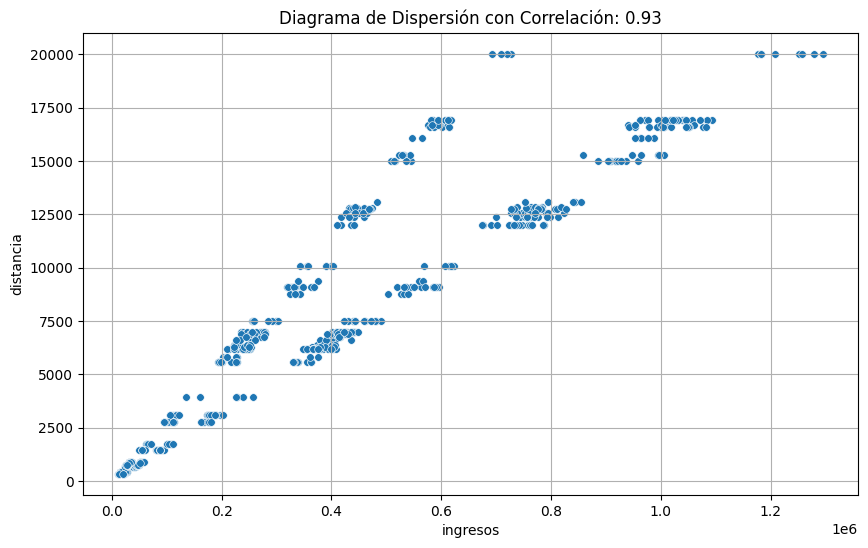

In [89]:
grafico_dispersion_con_correlacion(df_viajes,"ingresos","distancia", mostrar_correlacion= True, tamano_puntos= 30)

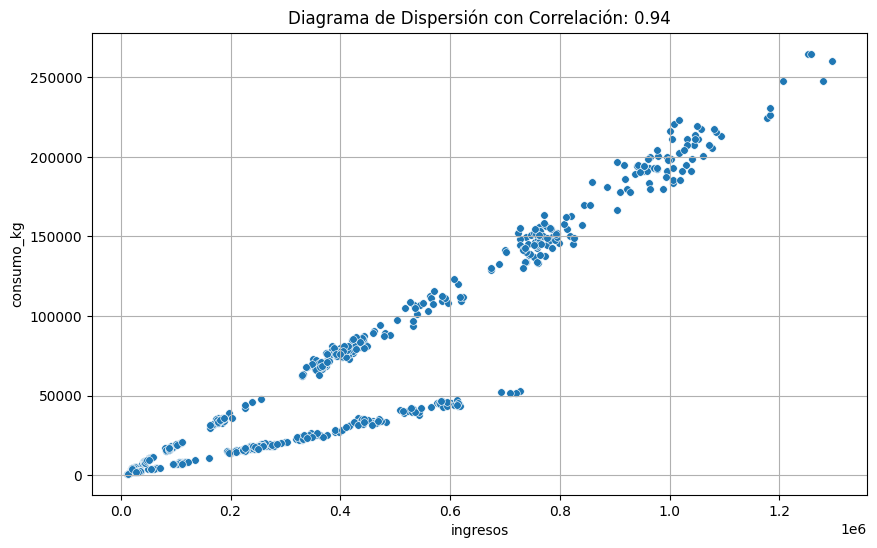

In [90]:
grafico_dispersion_con_correlacion(df_viajes,"ingresos","consumo_kg", mostrar_correlacion= True, tamano_puntos= 30)

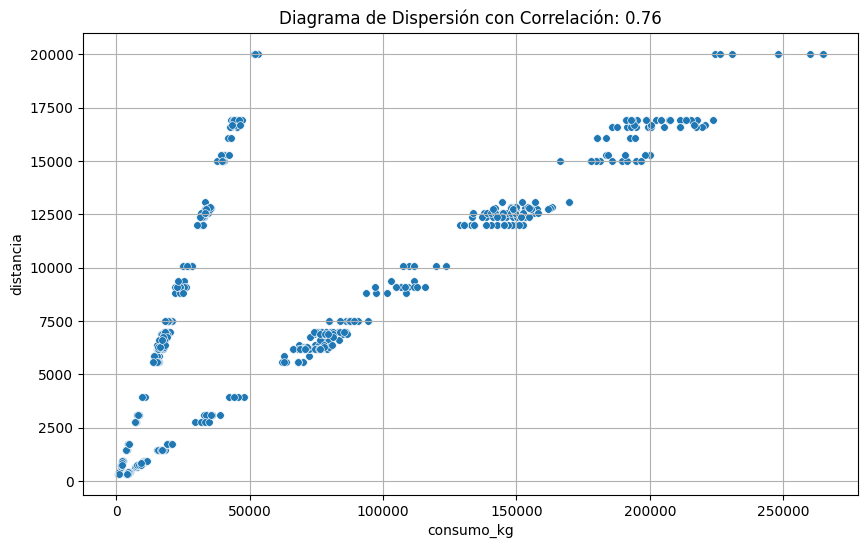

In [91]:
grafico_dispersion_con_correlacion(df_viajes,"consumo_kg","distancia", mostrar_correlacion= True, tamano_puntos= 30)

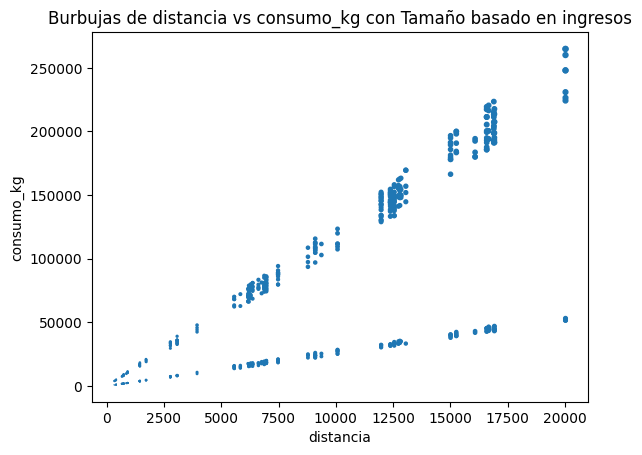

In [94]:
bubble_plot(df_viajes,"distancia","consumo_kg","ingresos", scale = 100000)

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [99]:
df_viajes["distancia"].describe()

count      600.000000
mean      8071.003333
std       5550.244086
min        344.000000
25%       3073.000000
50%       6877.000000
75%      12553.000000
max      20029.000000
Name: distancia, dtype: float64

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.